# Исследование данных о российском кинопрокате



**ПОСТАНОВКА ЗАДАЧИ**

Заказчик этого исследования — Министерство культуры Российской Федерации. 
Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Особое внимание необходимо уделить фильмам, которые получили государственную поддержку. 
Нам еобходимо ответить на основной вопрос, насколько такие фильмы интересны зрителю. 
Исходные данные: данные, опубликованные на портале открытых данных [Министерства культуры](https://opendata.mkrf.ru/). Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

## Откроем файлы с данными и объедим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

### Извлечение и первичны обзор данных

 Импортируем библиотеки pandas, numpy, matplotlib и seaborn. Считаем данные из csv-файлов и сохраним в переменные `df_movies` и `df_shows` соответственно. Путь к файлам: `/datasets/mkrf_movies.csv` (данные о прокатных удостоверениях) и `/datasets/mkrf_shows.csv` (данные о прокате в российских кинотеатрах). В качестве разделителя используется знак по умолчанию.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# чтение файла с данными и сохранение в df_movies и df_shows
try:
    df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
    df_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    df_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
    df_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')
    
# Установка опции для отображения всех столбцов
pd.options.display.max_columns = None

# Установка опции отображения максимального числа строк в выводе
pd.set_option('display.max_rows', None)

Выведем первые 10 строчек датафрейма `df_movies` на экран.

In [3]:
# получение первых 10 cтрок таблицы df_movies
df_movies.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


Выведем первые 10 строчек датафрейма `df_shows` на экран.

In [4]:
# получение первых 10 cтрок таблицы df_shows
df_shows.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


**Согласно документации к данным `mkrf_movies` мы имеем 15 столбцов:**
- *`title`* — название фильма;
- *`puNumber`* — номер прокатного удостоверения;
- *`show_start_date`* — дата премьеры фильма;
- *`type`* — тип фильма;
- *`film_studio`* — студия-производитель;
- *`production_country`* — страна-производитель;
- *`director`* — режиссёр;
- *`producer`* — продюсер;
- *`age_restriction`* — возрастная категория;
- *`refundable_support`* — объём возвратных средств государственной поддержки;
- *`nonrefundable_support`* — объём невозвратных средств государственной поддержки;
- *`financing_source`* — источник государственного финансирования;
- *`budget`* — общий бюджет фильма;
- *`ratings`* — рейтинг фильма на КиноПоиске;
- *`genres`* — жанр фильма.

**Согласно документации к данным `mkrf_shows` мы имеем 2 столбца:**
- *`puNumber`* — номер прокатного удостоверения;
- *`box_office`* — сборы в рублях.

Выведем основную информацию о датафреймах с помощью метода `info()`. 

In [5]:
df_movies.info()
print()
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

### Стиль заголовков

Переименуем название столбца `puNumber` согласно "змеиному" стилю

In [6]:
# переименование столбца
df_movies = df_movies.rename(columns={'puNumber' : 'pu_number'})
df_shows = df_shows.rename(columns={'puNumber' : 'pu_number'})

### Объединение данных в один DataFrame

Объединим оба датайрейма в один с помощью метода и сохраним в новую переменную `df`. В качестве общего столбца будем использовать столбец `puNumber`, но прежде чем выполнить слияние необходимо привести столбцы `puNumber` к одному типу в обоих датафреймах.

Проверим какие уникальные значения записаны в `df_movies` в столбце `pu_number`. Проверять `df_shows` не будем, так как там на основании `df_shows.info()` лежат только целые числа.

In [7]:
print(f"Уникальные значения в df_movies: {df_movies['pu_number'].sort_values().unique()}")
print(f"Количество уникальных значений в df_movies: {df_movies['pu_number'].nunique()} и общее количество строк: {df_movies.shape[0]}")
print(f"Количество уникальных значений в df_shows: {df_shows['pu_number'].nunique()} и общее количество строк: {df_shows.shape[0]}")

Уникальные значения в df_movies: [' 111004112' '111000110' '111000111' ... '231001012' '231001111' 'нет']
Количество уникальных значений в df_movies: 7484 и общее количество строк: 7486
Количество уникальных значений в df_shows: 3158 и общее количество строк: 3158


Обратим внимание на наличие пробелов и в слова "нет", а также, что присутствуют как минимум два дубликата в `df_movies` в столбце `puNumber`.

Удалим пробелы, а слово "нет" заменим на NaN и все переведем в формат `float`

In [8]:
# Заменим 'нет' на NaN в столбце 'puNumber' в df_movies
df_movies['pu_number'] = df_movies['pu_number'].replace('нет', np.nan)

# Удаление пробелов в начале и конце строк в столбце df_movies['puNumber'] и преобразование в числовой формат
df_movies['pu_number'] = df_movies['pu_number'].str.strip().astype(float)

# Преобразование столбца df_shows['puNumber'] в тип данных float
df_shows['pu_number'] = df_shows['pu_number'].astype(float)

In [9]:
# Объединение данных по столбцу 'puNumber', используя left join
# (все строки из df_movies будут включены в результирующий датафрейм)
df = df_movies.merge(df_shows, on='pu_number', how='left')

# получение первых 10 cтрок таблицы df_shows
df.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013.0,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614.0,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416.0,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114.0,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


Выведем основную информацию о датафреймах с помощью метода `info()`. 

In [10]:
# Выведем информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Итак, мы имее следующие тип данных:
- `float` - 5 переменные;
- `object` - 11 переменные.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Построим гистограммы для всех числовых значений

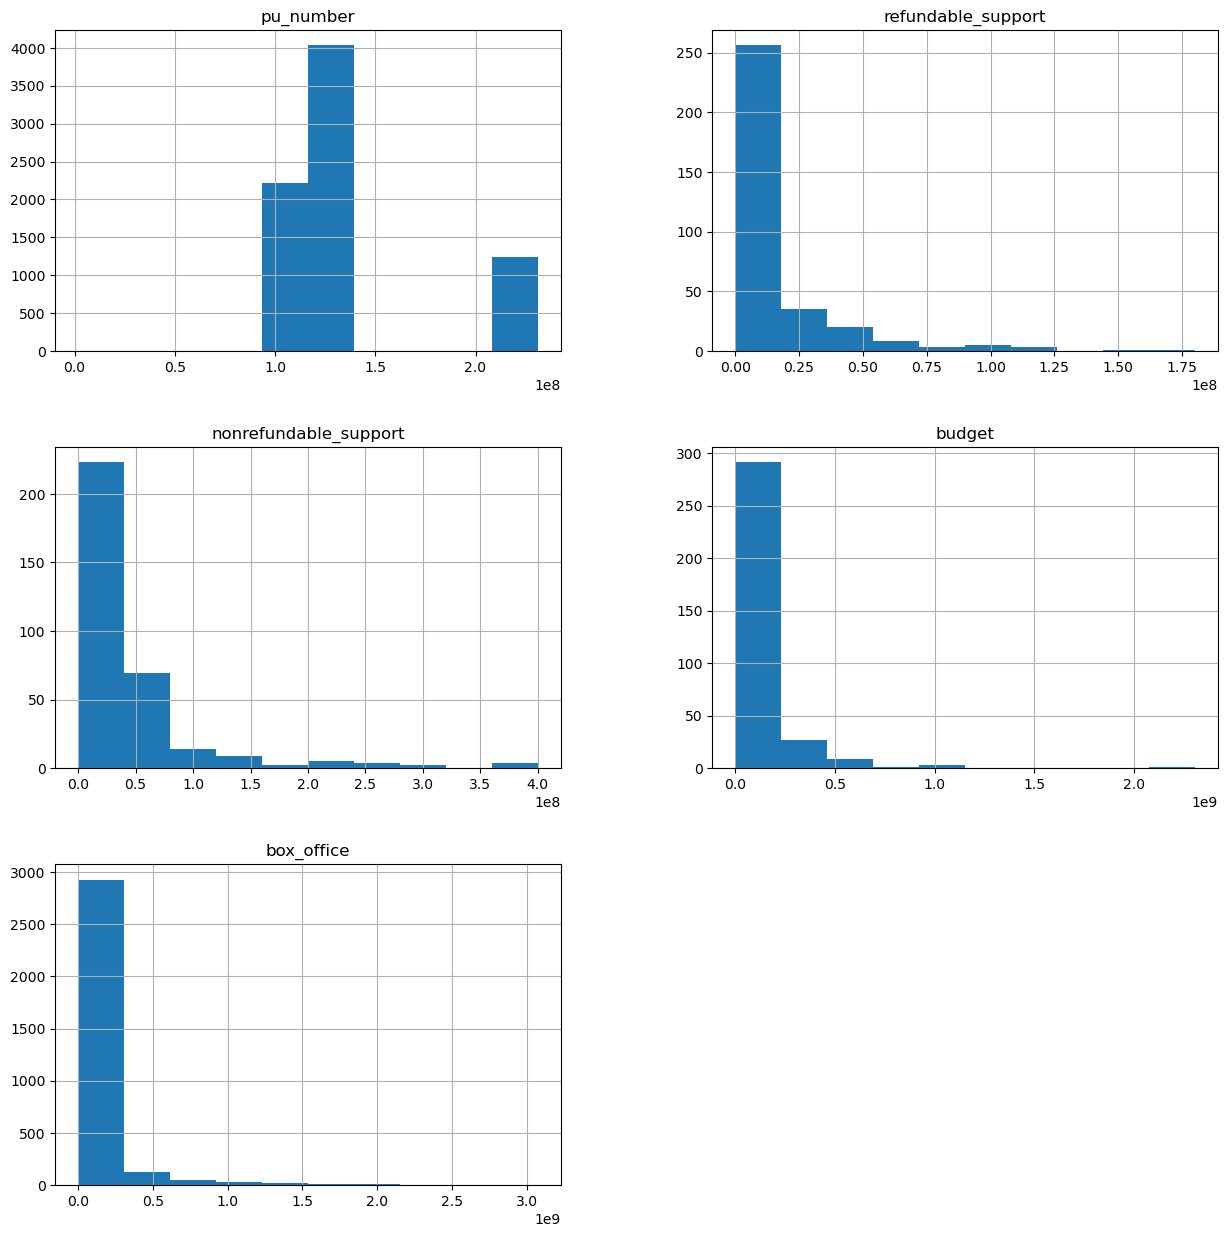

In [11]:
# Построим матрицу гистограмм с размером 15 на 15
df.hist(figsize=(15, 15));

**ВЫВОД:**

В первой главе проекта мы провели следующие действия.

- ***Импорт библиотек и загрузка данных:*** Импортировали библиотеки *pandas, numpy, matplotlib и seaborn*. Затем считали данные из csv-файлов в переменные `df_movies` и `df_shows.`

- ***Описание данных:*** Проанализировали структуру данных в `df_movies` и `df_shows,` `df_movies` содержит 15 столбцов, описывающих фильмы, включая номер прокатного удостоверения `(puNumber),` а `df_shows` - данные о прокате в российских кинотеатрах с двумя столбцами: `puNumber` и `box_office` (сборы в рублях).

- ***Анализ уникальных значений:*** Проверили уникальные значения столбца `'puNumber'` в обоих датафреймах. Выявили пробелы и слово "нет" в `df_movies,` а также обнаружили дубликаты.

- ***Обработка данных:*** Произвели обработку данных в `df_movies`, заменив "нет" на *NaN*, удалив пробелы в столбце `'puNumber'` и приведя его к числовому формату. Данные в `df_shows` в столбце `'puNumber'` также привели к единому стилю с данными `df_movies['puNumber']`.

- ***Объединение данных:*** С использованием метода *merge* объединили `df_movies` и `df_shows` по столбцу `'puNumber',` используя *left join.* Таким образом, сохранены все фильмы из `df_movies,` дополненные информацией из `df_shows.` Объединенная таблица сохранена в переменную `df.`

Данные готовы к проведению этапа предобработки.

## Предобработка данных

### Проверка типов данных

Проверим название всех столбцов

In [12]:
# проверка результатов - перечень названий столбцов
df.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

Поменяем тип данных в столбце `show_start_date` на date

In [13]:
# Преобразуем строки в формате UTC в объект datetime и отформатируем
df['show_start_date'] = pd.to_datetime(df['show_start_date']).dt.strftime('%Y-%m-%d')

# Преобразуем столбец 'show_start_date' в тип datetime
df['show_start_date'] = pd.to_datetime(df['show_start_date'])

# Выведем для проверки значения из столбца df['show_start_date']
df['show_start_date'].head()

0   2015-11-27
1   2016-09-13
2   2016-10-10
3   2016-06-10
4   2015-07-29
Name: show_start_date, dtype: datetime64[ns]

Выведем все уникальные значения в столбце `df['ratings']` 

In [14]:
df['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

В данных присутствуют рейтинги в формате процентов. Согласно [данным](https://www.kinopoisk.ru/lists/movies/top250/?ss_subscription=ANY) из кинопоиска максимальная оценка составляет 9.4 и минимальная 1.0. Поэтому утверждать, что эти оценки являются процентом от 10 бальной шкалы нельзя. Можно предположить, на основе [преамбуле](https://www.kinopoisk.ru/film/891359/votes/#:~:text=***%20%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B8%2C%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BD%D0%B5%D1%81%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%20%D0%AF%D0%BD%D0%B4%D0%B5%D0%BA%D1%81%D0%B0%20%D1%81%20%D0%BA%D0%BE%D0%BD%D0%B2%D0%B5%D1%80%D1%82%D0%B0%D1%86%D0%B8%D0%B5%D0%B9%20%D0%B8%D0%B7%205%2D%D0%B1%D0%B0%D0%BB%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B%20%D0%B2%2010%2D%D0%B1%D0%B0%D0%BB%D0%BB%D1%8C%D0%BD%D1%83%D1%8E%2C%20%D0%BD%D0%B5%20%D1%83%D1%87%D0%B8%D1%82%D1%8B%D0%B2%D0%B0%D1%8E%D1%82%D1%81%D1%8F%20%D0%B2%20%D1%80%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3%D0%B5%20%D0%9A%D0%B8%D0%BD%D0%BE%D0%BF%D0%BE%D0%B8%D1%81%D0%BA%D0%B0.) к рейтингам фильмов на сайте кинопоиска то, что эти данные являются процентом от 5 бальной шкалы рейтингов с Яндекса. 

Посчитаем количество строк где в столбце `df['ratings']` указаны проценты. Если данных много, то применим метод замены, если мало, то значения заменим на NaN, для того, чтобы не вносить искажения в данные.

In [15]:
# Фильтруем строки, где столбец 'ratings' не NaN и содержит '%' и подсчитаем количество строк в отфильтрованном датафрейме
df[df['ratings'].notna() & df['ratings'].str.contains('%')]['ratings'].count()
# где str.contains Проверяет, содержится ли шаблон или регулярное выражение в строке ряда или индекса.
# Возвращает логический ряд или индекс в зависимости от того, содержится ли данный шаблон или регулярное выражение в строке ряда или индекса.

29

Данных мало, заменим их на NaN

In [16]:
# Заменим все не числовые значения на NaN. Параметр coerce используется для замены невалидных (не числовых) значений на NaN
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

Поменяем тип данных на категорию для столбца `age_restriction`

In [17]:
df['age_restriction'] = df['age_restriction'].astype('category').cat.reorder_categories([
    '«0+» - для любой зрительской аудитории', 
    '«6+» - для детей старше 6 лет', 
    '«12+» - для детей старше 12 лет', 
    '«16+» - для детей старше 16 лет', 
    '«18+» - запрещено для детей'
])

Для проверки повторно выведем основную информацию о датафреймах с помощью метода `info()`. 

In [18]:
# Выведем информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   pu_number              7485 non-null   float64       
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   category      
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

**ВЫВОД:**

В данном разделе проекта мы провели следующие действия.
- **Проверка типов данных:** При анализе данных в датафрейме была проведена проверка типов данных. Используя метод `df.info(),` убедились, что большинство столбцов имеют подходящие типы данных.
- **Преобразование типов данных:** Для столбца `'show_start_date'` было проведено преобразование типа данных к формату *datetime.* Это позволяет более удобно работать с датами. Применили метод `pd.to_datetime` для преобразования и проверили результаты.
- **Название всех столбцов:** Вывели названия всех столбцов с помощью `df.columns` для быстрого обзора структуры датафрейма.
- **Обработка столбца 'ratings':** Провели анализ уникальных значений в столбце `'ratings'` и обнаружили наличие процентов. Посчитали количество строк, содержащих проценты, и решили заменить их пропущенными значениями.

В результате выполненных шагов данные подготовлены для более детального исследовательского анализа российского кинопроката.

### Изучим пропуски в датафрейме

In [19]:
# подсчёт пропусков
df.isna().sum()

title                       0
pu_number                   1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

#### Замена пропущенных значений в столбцах `pu_number`

Изучим строку с пропущенным значением в столбце `pu_number`

In [20]:
df[df['pu_number'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проверим эту строку на неявный дубликат

In [21]:
df[df['title'].str.contains('Курбан-роман')]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614.0,2014-09-02,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,0.0


В данных присутствует неявный дубликат. Удалим данную строчку, где пропущено значение в столбце `pu_number`. И так как в данных останутся только целые числа, поменяем тип данных на 'int'

In [22]:
# Удаление строк с пропущенным значением в столбце pu_number
df.dropna(subset=['pu_number'], inplace=True)

# Замена типа данных столбца pu_number на int
df['pu_number'] = df['pu_number'].astype(int)

# Посчитаем сумму пропущенных значений в столбце pu_number
df['pu_number'].isna().sum()

0

**Вывод:** В столбце `'pu_number'` присутствовало одно пропущенное значение. Появление данного пропущенного значения было следствием, что к моменту первого показа, данный фильм не имел прокатного удостоверения, и только спустя 4 месяца с получением прокатного удостоверения данный фильм повторно вышел в прокат. Данную строку в виду наличия неявного дубликата было решено удалить.

#### Замена пропущенных значений в столбцах `film_studio`, `director`

Проверим количество строк где в столбцах `producer и director` пропущенные значения.

In [23]:
df[pd.isna(df['director']) & pd.isna(df['producer'])].shape[0]

4

В половине строк где пропущены значения в `director` пропущены и в `producer`, тем самым заменим пропущенные значения в столбце на *неизвестно*    

In [24]:
# Список столбцов, в которых нужно заменить пропущенные значения
columns_to_fillna = ['film_studio', 'director']

# Замена пропущенных значений в указанных столбцах
df[columns_to_fillna] = df[columns_to_fillna].fillna('неизвестно')

# Проверим пропущенные значения
print(f'Количество пропущенных значений в столбце film_studio: {df["film_studio"].isna().sum()}')
print(f'Количество пропущенных значений в столбце director: {df["director"].isna().sum()}')

Количество пропущенных значений в столбце film_studio: 0
Количество пропущенных значений в столбце director: 0


**Вывод** В столбцах `film_studio, director` присутствовало 18 и 9 пропущенных значений соответственно. Появление данных пропущенных значений возможно по причине того, что данные фильмы были созданными малыми коллективами в рамках учебных проектов либо дипломных работ.

#### Замена пропущенных значений в столбцах `production_country`

Выведем строки где пропущены значения.

In [25]:
df[df['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,неизвестно,NaN,неизвестно,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Заменим пропущенные значения, значением из другой строки, при условии что данные в столбце `film_studio` совпадают. А для строки 4441 можно либо заменить на "неизвестно", либо заменить на "Россия" на основании этих [данных](https://www.kinopoisk.ru/series/487219/) с сайта кинопоиск.

In [26]:
# Замена пропущенных значений в столбце 'production_country'
df['production_country'] = df['production_country'].fillna(df.groupby('film_studio')['production_country'].transform('first'))

# Замена пропущенных значений в строке 4441, так как отсутсвую данные в столбце film_studio
df.loc[4441, 'production_country'] = "Россия"

# Проверим пропущенные значения
df['production_country'].isna().sum()

0

**Вывод** Пропущенные значения были заменены на аналогичные значения из других строк с совпадающим значением в столбце `film_studio.`

#### Замена пропущенных значений в столбцах `producer`

Выведем строки где пропущены значения.

In [27]:
df[df['producer'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN


Можно заметить, что в данных встречаются часто в столбце `production_country` "СССР". Проверим предположение, что в столбце `producer` указанны данные из `film_studio` так как в основном в Советское время продюсерами фильмов указывались сами студии. Проверим это утверждение, выводом строк в которых сдержаться данные о продюсерах и страной выпуска являлся СССР

In [28]:
df[(df['production_country'].str.contains('СССР')) & ~df['producer'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3093,Александр Невский (восстановленная версия),111001516,2016-02-12,Художественный,"Киностудия ""Мосфильм"", ФГУП ""Киноконцерн ""Мосф...","СССР, Россия","С.Эйзенштейн, Д.Васильев","ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.7,"боевик,драма,криминал",NaN
3193,Берегись автомобиля (цветная версия),111001316,2016-02-11,Художественный,"Киностудия ""Мосфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",Э.Рязанов,"ЗАО ""Киновидеообъединение ""Крупный план"", ООО ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"мелодрама,комедия,криминал",NaN
3926,Сафари № 6,111001611,2011-02-17,Художественный,ИП Аболс А.Р.,СССР,А.Аболс,А.Аболс,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,военный,NaN
3931,Сон в красном тереме,112000311,2011-02-17,Документальный,ИП Аболс А.Р.,СССР,"К.Котельников, А.Аболс",А.Аболс,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3962,Небесный тихоход (новая цветная версия),111000110,2010-01-14,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.0,"комедия,военный",NaN
4008,"Освобождение. Фильм 1-й ""Огненная дуга"".",111002310,2010-02-27,Художественный,"Киностудия ""Мосфильм"" при участии ""ДИНО ДЕ ЛАУ...",СССР - Италия,Ю.Озеров,"ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"драма,мелодрама,военный",NaN
4009,"Освобождение. Фильм 2-й ""Прорыв"".",111002410,2010-02-27,Художественный,"Киностудия ""Мосфильм"" при участии ""ДИНО ДЕ ЛАУ...",СССР - Италия,Ю.Озеров,"ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,"драма,военный",NaN
4010,"Освобождение. Фильм 3-й ""Направление главного ...",111002510,2010-02-27,Художественный,"Киностудия ""Мосфильм"" при участии ""ДЕФА"", кино...",СССР - ГДР - Польша - Италия,"Ю.Озеров, Ю.Бондарев","ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.1,"драма,мелодрама,военный",NaN
4011,"Освобождение. Фильм 4-й ""Битва за Берлин"".",111002610,2010-02-27,Художественный,"Киностудия ""Мосфильм"" при участии ""ДЕФА"", кино...",СССР - ГДР - Польша - Италия,"Ю.Озеров, Ю.Бондарев","ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,военный,NaN
4012,"Освобождение. Фильм 5-й ""Последний штурм"".",111002710,2010-02-27,Художественный,"Киностудия ""Мосфильм"" при участии ""ДЕФА"", кино...",СССР - ГДР - Польша - Италия,"Ю.Озеров, Ю.Бондарев","ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.2,военный,NaN


Предположение подтвердилось, заменим в пропущенные значения в столбце `producer` на значение из столбца `film_studio` при условии что в столбце `production_country` присутствуют слово *СССР*. Но перед этим выведем уникальные названия столбца `producer,` где встречается слово 'Мосфильм', так как это один из главных на то время киностудий страны.

In [29]:
# Фильтрация строк, где 'producer' содержит 'Мосфильм', и подсчет уникальных значений
df[df['producer'].str.contains('Мосфильм', na=False)]['producer'].unique()

array([' ФГУП "Киноконцерн "Мосфильм"', 'ФГУП "Киноконцерн "Мосфильм"',
       'ООО "План2Реал", ФГУП "Киноконцерн "Мосфильм"'], dtype=object)

In [30]:
# Замена пропущенных значений в столбце 'producer'
df['producer'] = df.apply(lambda row: row['film_studio'] 
                          if pd.notna(row['production_country']) and 'СССР' in row['production_country'] 
                          and pd.isna(row['producer']) else row['producer'], axis=1)

# Проверим пропущенные значения
df['producer'].isna().sum()

174

Теперь для столбца `producer` заменим названия которые перетеки из `film_studio` на 'ФГУП "Киноконцерн Мосфильм"' при условии, что в столбце `producer` встречается слово 'Мосфильм'.

In [31]:
# Замена значений в столбце 'producer'
#df['producer'] = df['producer'].str.replace('Мосфильм', 'ФГУП "Киноконцерн Мосфильм"', case=False)

# Замена значений в столбце 'producer', учитывая пропущенные значения
df['producer'] = df['producer'].apply(lambda x: 'ФГУП "Киноконцерн Мосфильм"' if pd.notna(x) and 'Мосфильм' in x else x)


# Фильтрация строк, где 'producer' содержит 'Мосфильм', и подсчет уникальных значений
df[df['producer'].str.contains('Мосфильм', na=False)]['producer'].unique()

array(['ФГУП "Киноконцерн Мосфильм"'], dtype=object)

оставшиеся значения заменим на "неизвестно"

In [32]:
# Замена пропущенных значений в указанных столбцах
df['producer'] = df['producer'].fillna('неизвестно')

# Проверим пропущенные значения
df['producer'].isna().sum()

0

**Вывод** Пропущенные значения в `producer` были заменены на соответствующие значения из `film_studio` для случаев, связанных с Советским Союзом. Значения, содержащие 'Мосфильм', заменены на 'ФГУП "Киноконцерн Мосфильм"'. Оставшиеся пропущенные значения заменены на 'неизвестно'.

#### Замена пропущенных значений в столбцах `genres и ratings`

Проверим в скольки строках пропущены значения в обоих столбцах. 

In [33]:
df[pd.isna(df['genres']) & pd.isna(df['ratings'])].shape[0]

969

Практически во всех строках где пропущенные значения в `genres` пропущены и в `ratings`. Выведем сводную таблицу для пропущенных значений в `genres` по типу фильма. 

In [34]:
pd.pivot_table(df[df['genres'].isna()], values='title', index='type', aggfunc='count')

,title
type,
Художественный,158
Анимационный,258
Документальный,126
Научно-популярный,18
Прочие,198
Художественный,217


Сразу запомним, что есть дубликаты в столбце `type`. Предположим, что если фильм "Документальный", то и жанр у таких фильмов тоже документальный. Выведем часть датафрейма, удовлетворяющий этому предположению и проанализируем жанр.

In [35]:
df[(df['type'] == 'Документальный') & ~pd.isna(df['genres'])].head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
124,Галапагосы 3D.,126004116,2016-08-11,Документальный,"Аймакс Корпорэйшн, Мандэлэй Медиа Артс",США-Канада,"Эл Гиддингс, Дэвид Кларк","Эл Гиддингс, Дэвид Кларк",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.8,"документальный,короткометражка",102940.0
212,Обыкновенный фашизм,112000215,2015-04-23,Документальный,"Киностудия ""Мосфильм""",СССР,М.Ромм,"ФГУП ""Киноконцерн Мосфильм""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.3,"документальный,военный,история",150.0
376,Серфинг на Таити 3D,226006312,2012-04-05,Документальный,Перфект Вэйв Продакшн Инк.,США,Стефан Лоу,Петро Л.Серапиглия,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,документальный,NaN
496,Космическая станция 3D.,122000212,2012-04-10,Документальный,"Говард Холл Продакшнз, Аймакс Корпорейшн, Уорн...",США - Канада,Тони Майерс,Тони Майерс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.6,документальный,NaN
497,На глубине морской 3D,122000312,2012-04-10,Документальный,"Говард Холл Продакшнз, Аймакс Корпорейшн, Уорн...",США - Канада,Говард Холл,Тони Майерс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.0,"документальный,короткометражка",NaN
533,Чудеса океана 3D.,122000112,2012-02-17,Документальный,3Д Интертейнмент,США-Франция,Жан-Жак Мантелло,Френсис Мантелло,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.0,"документальный,короткометражка,семейный",NaN
615,Поморы,112000212,2012-01-19,Документальный,"ОАО ""ТПО ""Санкт-Петербургская студия документа...",Россия,А.Стреляная,А.Тельнов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.4,"документальный,приключения",NaN
769,Стив Джобс. Потерянное интервью,122001512,2012-10-01,Документальный,Стакс Интертейнмент,США,Пол Сен,"Джон Гау, Стефан Сегаллер, Пол Сен",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.6,документальный,NaN
818,Кубатон,122001112,2012-07-16,Документальный,Элфвик Филм,Швеция-Куба,Дэниэл Фриделль,"Дэниэл Фриделль, Ингемар Йоханссон",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.0,"документальный,драма,семейный",NaN
825,Бобби Фишер против всего мира,122000412,2012-06-15,Документальный,Мокси Файеркрекер/ НВО Докьюментари Филмз/ ЛМ ...,США-Великобритания-Ирландия,Лиз Гарбус,"Рори Кеннеди, Стэнли Ф. Бушталь, Лиз Гарбус",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,"документальный,биография,история",NaN


Предположение оказалось верным. Заменим в столбце `genres` пропущенные значения на "документальный", если тип фильма документальный.

In [36]:
# Замена пропущенных значений в столбце 'genres' для документальных фильмов
df.loc[(df['type'] == 'Документальный') & df['genres'].isna(), 'genres'] = 'документальный'

# Проверим пропущенные значения
df['genres'].isna().sum()

849

Аналогично сделаем и для типа фильма "Анимационный"

In [37]:
df[(df['type'] == 'Анимационный') & ~pd.isna(df['genres'])].head(15)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
32,Пиноккио 3000,224020512,2012-08-27,Анимационный,"Синегруп, Анимакидс-Франс 2 Синема/Кастелао Пр...",Канада - Франция - Испания,Даниэль Робишо,Луис Дюкью,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.3,"мультфильм,фантастика,фэнтези",NaN
60,Братец медвежонок /По одноименному произведени...,224029312,2012-11-19,Анимационный,"Уолт Дисней Пикчерз, Буена Виста Интернэшнл",США,"Айрон Блейз, Роберт Уокер",Чак Уильямс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"мультфильм,фэнтези,комедия",NaN
94,Вольт,224029412,2012-11-19,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Крис Уильямс, Байрон Ховард",Кларк Спенсер,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.3,"мультфильм,драма,комедия",NaN
175,Замок с привидениями 3D,124000617,2017-03-21,Анимационный,"Мовида, Трикс, Эн Вейв Пикчерз",США - Бельгия,Бен Стэйссен,"Шарлотта Клей Хаггинс, Керолайн Ван Айсгем",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,4.3,"мультфильм,короткометражка,ужасы",NaN
219,Новые приключения Золушки,224030212,2012-11-19,Анимационный,"Вэнгард Филмз, Одиссей Интертейнмент, Берлин А...",США - Германия,Пол Джей Болджер,Джон Эйч Уильямс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.1,"мультфильм,фэнтези,комедия",NaN
236,Порко Россо,124002614,2014-09-30,Анимационный,Студия Гибли,Япония,Хаяо Миядзаки,неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"аниме,мультфильм,фэнтези",NaN
258,Мулан,224029712,2012-11-19,Анимационный,Уолт Дисней Пикчерз,США,"Тони Бэнкфорт, Бэрри Кук",Роберт С.Гарбер,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.2,"боевик,фэнтези,драма",NaN
351,Волшебное приключение,124000905,2015-01-18,Анимационный,"Экшион Филмз, Патэ Синема, Болексбразерс",Великобритания - Франция,Дэйв Бортвик,"Клауди Горский, Энди Лэйтон, Лаурен Родон, Пас...",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,5.7,"мультфильм,фэнтези,комедия",100.0
378,Рапунцель: Запутанная история,224013614,2014-10-10,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.9,"мультфильм,мюзикл,фэнтези",NaN
379,Рапунцель: Запутанная история,224026712,2012-10-23,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.9,"мультфильм,мюзикл,фэнтези",NaN


В большинстве случаях анимационные фильмы имеют жанр "мультфильм". Заменим в столбце `genres` пропущенные значения на "мультфильм", если тип фильма анимационный.

In [38]:
# Замена пропущенных значений в столбце 'genres' для анимационных фильмов
df.loc[(df['type'] == 'Анимационный') & df['genres'].isna(), 'genres'] = 'мультфильм'

# Проверим пропущенные значения
df['genres'].isna().sum()

591

Остальные пропущенные значения заменим на "неизвестно"

In [39]:
# Замена пропущенных значений в указанном столбце
df['genres'] = df['genres'].fillna('неизвестно')

# Проверим пропущенные значения
df['genres'].isna().sum()

0

**Вывод:** 
- В данных обнаружено 969 строк, где одновременно пропущены значения в столбцах 'genres' и 'ratings'.

- Проанализированы пропущенные значения в столбце 'genres' по типам фильмов. Предположение о том, что для документальных фильмов жанр также может быть документальным, подтвердилось. Также было замечено, что анимационные фильмы часто имеют жанр "мультфильм".

- Заменены пропущенные значения в столбце 'genres' для документальных фильмов на "документальный" и для анимационных фильмов на "мультфильм".

- Оставшиеся пропущенные значения в столбце 'genres' заменены на "неизвестно".

- Пропущенные значения в столбце `ratings` оставлены без изменений, чтобы не вносить искажения в данные.

#### Замена пропущенных значений в оставщихся столбцах

Пропущенные значения имеюются в следующих столбцах:
- refundable_support;
- nonrefundable_support;
- budget;
- financing_source;
- box_office.

Проверим, что пропуски в значениях `refundable_support, nonrefundable_support, budget и financing_source` находятся в одних и тех же строках.

In [40]:
df[pd.isna(df['refundable_support']) & pd.isna(df['nonrefundable_support']) 
   & pd.isna(df['budget']) & pd.isna(df['financing_source'])].shape[0]

7153

In [41]:
df.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                      0
box_office               4327
dtype: int64

**Вывод**
Пропущенные значения в строках свидетельствует о том, что только в 332 фильмах присутствует госфинансирование. Пропущенные значения в столбце `box_office` могли появится в виду того, что по данным фильмам не имеется данных о сборах, в виду их отсутствия в прокате, либо ошибкой при выгрузке данных в датафрейм. 

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 2.2:** 
- В столбце `pu_number` было обнаружено одно пропущенное значение. Это пропущенное значение возникло из-за того, что на момент первого показа у фильма не было прокатного удостоверения. Позднее, спустя 4 месяца, фильм вышел в прокат после получения прокатного удостоверения. Учитывая наличие неявного дубликата, эта строка была удалена.

- В столбцах `film_studio и director` было обнаружено 18 и 9 пропущенных значений соответственно. Вероятная причина - создание фильмов малыми коллективами в рамках учебных проектов или дипломных работ.

- Пропущенные значения в столбце `film_studio` были заменены на аналогичные значения из других строк с совпадающим значением в этом столбце.

- Пропущенные значения в столбце `producer` были заменены значениями из столбца `film_studio` для случаев, связанных с Советским Союзом. Значения, содержащие 'Мосфильм', были заменены на 'ФГУП "Киноконцерн Мосфильм"'. Оставшиеся пропущенные значения были заменены на 'неизвестно'.

- Обнаружено 969 строк, где одновременно пропущены значения в столбцах `genres и ratings`. Пропущенные значения в столбце `genres` были заменены на "документальный" для документальных фильмов и "мультфильм" для анимационных фильмов. Оставшиеся пропущенные значения в `genres` были заменены на "неизвестно".

- Пропущенные значения в столбце `ratings` оставлены без изменений.

- Пропущенные значения в строках столбца `financing_source` свидетельствуют о том, что только в 332 фильмах присутствует госфинансирование.

- Пропущенные значения в столбце `box_office` могли возникнуть из-за отсутствия данных о сборах для определенных фильмов в прокате или ошибок при выгрузке данных в датафрейм.

### Изучим дубликаты в датафрейме

Посчитаем количество явных дубликатов

In [42]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют. Обработаем неявные дубликаты. Проверим столбце `pu_number`

In [43]:
# Посчитаем количесвто дубликатов в столбце pu_number
df['pu_number'].duplicated().sum()

2

Выведем эти дубликаты

In [44]:
# Выбор всех строк, в которых значение в столбце 'pu_number' встречается более одного раза (дубликаты)
df[df.duplicated('pu_number', keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


После анализа выведенных дубликатов, можно сделать следующие выводы. Что фильмы под индексами 4638 и 4639 не являются дубликатами, а номера прокатного удостоверения и дата премьеры фильма указаны одинаково по ошибке, следовательно необходимо заменить номер прокатного удостоверения на новое уникальное значение. А фильмы под индексами 5067 и 5068 являются явными дубликатами и необходимо оставить фильм с наибольшим рейтингом.

Заменим номер прокатного удостоверения для фильма с индексом 4639 с 221154310 на 221154320. Перед этим проверим есть ли такой номер в датафрейме.

In [45]:
# Проверка наличия номера прокатного удостоверения в датафрейме
df[df['pu_number'] == 221154320]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [46]:
# Замена номера прокатного удостоверения
df.loc[4639, 'pu_number'] = 221154320

Удалим неявные дубликаты в столбце `pu_number` и проверим количество дубликатов.

In [47]:
# Найдем индекс фильма с максимальным рейтингом в группе дубликатов
max_rating_index = df.loc[df.duplicated('pu_number', keep=False), 'ratings'].idxmax()

# Удалим дубликаты, оставив фильм с максимальным рейтингом
df.drop(df[df.duplicated('pu_number', keep=False)].index.difference([max_rating_index]), inplace=True)

# Посчитаем количесвто дубликатов в столбце pu_number
df['pu_number'].duplicated().sum()

0

Проверим наличия невных дубликатов в столбце `title`

In [48]:
# Выбор 10 строк, в которых значение в столбце 'title' встречается более одного раза (дубликаты)
df[df.duplicated('title', keep=False)].sort_values('title').head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
4852,127 часов,121000811,2011-01-27,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",NaN
3130,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",18439240.55
1494,13-й район: Кирпичные особняки,121008314,2014-04-25,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"боевик,криминал",750.00
1493,13-й район: Кирпичные особняки,221033314,2014-08-20,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"боевик,криминал",NaN
4107,13.,221123710,2010-10-25,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,неизвестно,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"триллер,драма,криминал",NaN
4307,13.,121018110,2010-09-30,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,неизвестно,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.8,"триллер,драма,криминал",NaN


In [49]:
# Количество неявных дубликатов в столбце 'title'
df['title'].duplicated().sum()

714

Количество неявных дубликатов в столбце `title` составило 714. После анализа датафрейма было выявлено, что данные фильмы выходил под разными прокатными удостоверениями и в разное время. Оставим наличие этих неявных дубликатов без изменений. 

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 2.3:** 
- *Явные дубликаты:* Первоначальная проверка на наличие явных дубликатов не выявила повторяющихся строк в датафрейме.

- *Неявные дубликаты в столбце 'pu_number':* Было обнаружено два неявных дубликата в столбце 'pu_number'. После внимательного анализа стало понятно, что фильмы с индексами 4638 и 4639 не являются дубликатами. Они имеют одинаковые номера прокатного удостоверения и даты премьеры по ошибке. Решено было заменить номер прокатного удостоверения для фильма с индексом 4639 с 221154310 на 221154320. Фильмы с индексами 5067 и 5068 являются явными дубликатами. Решено было оставить фильм с наивысшим рейтингом и удалить дубликат.
- *Неявные дубликаты в столбце 'title':* Было обнаружено 714 неявных дубликата в столбце 'title'. Было принято решение не удалять неявные дубликаты, так как данные фильмы выходили в разное время под разными уникальными прокатными удостоверениями, а также могут быть присутсвовать разные фильмы с одинаковыми названиями. 

### Изучим категориальные значения

При предобработке данных было выявлено, что в большинства столбцах где присутствуют категориальные данные имеются лишние пробел, тем самым появляются дубликаты в уникальных значениях. Уберем лишние пробелы в данных.

In [50]:
# Создадим список для категориальных столбцов
columns_to_strip = ['type', 'title', 'film_studio', 'production_country', 'director', 'producer', 
                    'age_restriction', 'financing_source', 'genres']

# Выведем количество уникальных значений для данных столбцов
df[columns_to_strip].nunique()

type                     8
title                 6770
film_studio           5490
production_country     950
director              4811
producer              5359
age_restriction          5
financing_source         3
genres                 743
dtype: int64

In [51]:
# Применяем метод str.strip() к выбранным столбцам
df[columns_to_strip] = df[columns_to_strip].apply(lambda x: x.str.strip())

In [52]:
df[columns_to_strip].nunique()

type                     6
title                 6770
film_studio           5462
production_country     934
director              4801
producer              5345
age_restriction          5
financing_source         3
genres                 743
dtype: int64

Количество уникальных значений уменьшилось в следующих столбцах:
- `type` - на 2 значения;
- `film_studio` - на 28 значений;
- `production_country` - на 16 значениё;
- `director` - на 10 значений;
- `director` - на 14 значений.

In [53]:
df['director'].sort_values().unique()

array(['Ёлкин Туйчиев', 'Ён Сан-хо', 'А Андрющенко', ...,
       'хореография Пьера Лакотта по Филиппу Тальони',
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона'],
      dtype=object)

В столбцах producer и director присутствуют неявные дубликаты в виду разного перевода имен и фамилий на русский язык.

In [54]:
df['production_country'].sort_values().unique()

array(['2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия', 'Бельгия',
       'Бельгия -

В production_country необходимо заменить "-" на "," и удалить пробелы между знаками препинания. Также в столбце production_country обнаружено аномальное значение "2019", заменим на "неизвестно". Также заменим "Китай" на "КНР" и удалим в названиях "Республика".

In [55]:
# Замена символов в столбце production_country
df['production_country'] = df['production_country'].str.replace(' ', '').str.replace('-', ',')

# Замена значения "2019" на "неизвестно" в столбце production_country
df['production_country'] = df['production_country'].replace('2019', 'неизвестно')

# Замена "Китай" на "КНР"
df['production_country'] = df['production_country'].replace('Китай', 'КНР')

# Удаление "Республика" из значений в столбце production_country
df['production_country'] = df['production_country'].str.replace('Республика', '')

# Проверим количество уникальных значений
df['production_country'].nunique()

806

В столбце `production_country` устранили 128 неявных дубликатов.

В столбцах`production_country, film_studio, director, producer и genres` данные представлены в виде списка, при необходимости можно сохранить только первые значения из этих списков (раскомментировать код). 

In [56]:
# Сохранение только первых значений из списков в указанных столбцах, для 
#df['production_country'] = df['production_country'].str[0]
#df['film_studio'] = df['film_studio'].str[0]
#df['director'] = df['director'].str[0]
#df['producer'] = df['producer'].str[0]
#df['genres'] = df['genres'].str[0]

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 2.4:** 
- *Проблема с лишними пробелами в категориальных данных:*
В большинстве столбцов с категориальными данными были выявлены лишние пробелы, что приводило к дубликатам в уникальных значениях. Эта проблема была успешно исправлена путем удаления лишних пробелов.

- *Исправление значений в столбце `production_country:`*
    - Заменены символы "-" на ",".
    - Удалены пробелы между знаками препинания.
    - Заменено аномальное значение "2019" на "неизвестно".
    - Заменено "Китай" на "КНР".
    - Удалено "Республика" из значений.
- *Работа с неявными дубликатами:*
В столбцах `producer и director` были обнаружены неявные дубликаты из-за различных переводов имен и фамилий на русский язык. Для решения этой проблемы можно было бы привести все имена и фамилии к единому виду, но в данном случае эта задача оставлена за рамками текущего вывода.

- *Исправление значений в столбце type:*
Обнаружена общая проблема в столбце `type.` Количество уникальных значений уменьшилось на 2 после удаления лишних пробелов. Возможно, эти проблемы возникли из-за некорректного ввода данных.

- *Сохранение только первых значений из списков:*
В столбцах `production_country, film_studio, director, producer, и genres,` где данные представлены в виде списков, предложено сохранить только первые значения. Однако этот шаг был закомментирован и оставлен на усмотрение заказчика.

***Общая проблема***, встречающаяся почти во всех категориальных столбцах, заключается в наличии лишних пробелов в значениях. Это приводит к тому, что уникальные значения считаются различными из-за различий в пробелах в начале или конце строк. Такие различия в пробелах могут создавать дубликаты в уникальных значениях и затруднять анализ данных.

Эти шаги позволяют улучшить качество данных, сделать их более чистыми и подготовленными для дальнейшего анализа.

### Проверим количественные значения

Выведем основные статистические значения для количественных переменных и построем гистограммы.

In [57]:
# Вывод основных статистических значений для количественных переменных
df.describe()

,pu_number,show_start_date,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.484000e+03,7484,3.320000e+02,3.320000e+02,3.320000e+02,6489.000000,3.158000e+03
mean,1.351851e+08,2015-02-20 15:11:03.816141056,1.186446e+07,4.898099e+07,1.272297e+08,6.479196,7.647870e+07
min,1.811096e+06,2010-01-11 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.120251e+08,2012-07-05 00:00:00,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.623900e+04
50%,1.210155e+08,2015-03-05 00:00:00,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.327988e+06
75%,1.240033e+08,2017-11-30 00:00:00,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.397967e+07
max,2.310011e+08,2019-12-30 00:00:00,1.800000e+08,4.000000e+08,2.305074e+09,9.200000,3.073569e+09
std,3.834264e+07,NaN,2.491656e+07,5.998012e+07,1.885883e+08,1.101742,2.403531e+08


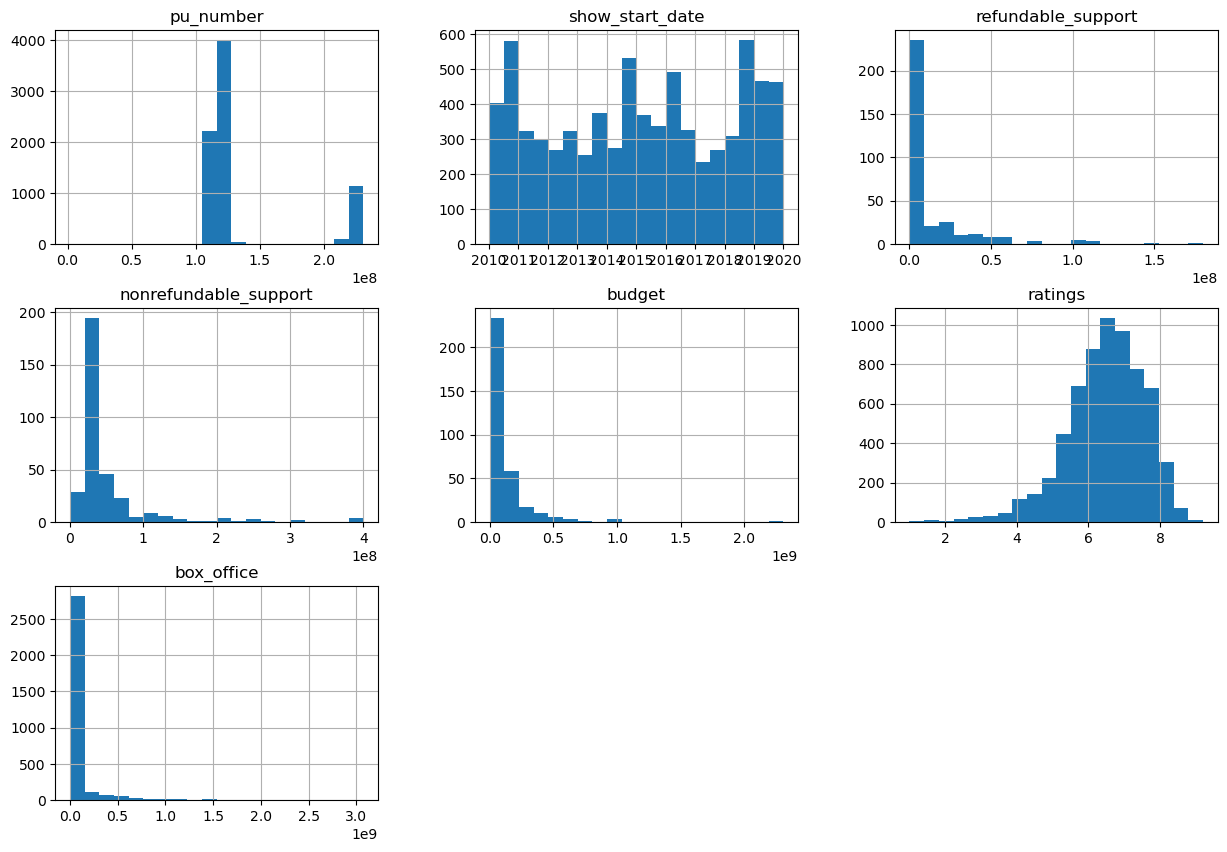

In [58]:
df.hist(bins=20, figsize=(15,10));

Выведем первые 10 отсортированных уникальных значений в столбце `budget`

In [59]:
# Выводим первые 10 уникальных значений из столбца 'budget'
df['budget'].sort_values().unique()[:10]

array([       0., 14462464., 15010000., 18166418., 18706080., 27000000.,
       28115580., 28571429., 30000000., 30448911.])

Как мы видим есть строки где бюджет фильма равен 0. Выведем эти фильмы и проанализируем.

In [60]:
# Выведем количество фильмом с нулевым бюджетом
df[(df['budget'] == 0)].shape[0]

17

In [61]:
df[(df['budget'] == 0)].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196572438.4
2532,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67418974.8
2615,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.4


Удалим эти строки, так как сумма бюджета в них не указана, а рассчитать ее не представляется возможным. 

In [62]:
df.drop(df[df['budget'] == 0].index, inplace=True)

Конечно можно попробовать рассчитать сумму бюджета, как сумма возвратных и не возвратных средств разделенное на медианное значение доли от общего бюджета фильма составляющая государственную поддержку. Для этого нужно закомментировать предыдущий код и раскомментировать ниженаписанный код. 

In [63]:
#((df[df['budget'] <= (df['refundable_support'] + df['nonrefundable_support'])]['refundable_support'] + 
#  df[df['budget'] <= (df['refundable_support'] + df['nonrefundable_support'])]['nonrefundable_support']) 
# / (((df['refundable_support'] + df['nonrefundable_support']) / df['budget']).median()))

Посчитаем количество фильмом с нулевыми суммами по сборам.

In [64]:
df[(df['box_office'] == 0)].shape[0]

24

In [65]:
# Выводим уникальные значения в столбце 'box_office', отсортированные по возрастанию
df['box_office'].sort_values().unique()[:100]

array([   0.,   40.,   50.,   75.,   80.,  100.,  115.,  120.,  125.,
        130.,  135.,  140.,  150.,  165.,  170.,  180.,  190.,  200.,
        210.,  225.,  235.,  240.,  250.,  260.,  295.,  300.,  330.,
        340.,  350.,  360.,  370.,  380.,  400.,  405.,  420.,  425.,
        450.,  460.,  465.,  480.,  490.,  500.,  520.,  540.,  550.,
        560.,  580.,  585.,  600.,  620.,  635.,  650.,  660.,  680.,
        690.,  700.,  710.,  720.,  735.,  740.,  750.,  760.,  765.,
        775.,  780.,  785.,  800.,  830.,  850.,  860.,  865.,  880.,
        895.,  900.,  930.,  940.,  950.,  960.,  975.,  980., 1000.,
       1010., 1020., 1030., 1040., 1045., 1050., 1070., 1075., 1090.,
       1100., 1110., 1140., 1149., 1150., 1165., 1188., 1190., 1200.,
       1230.])

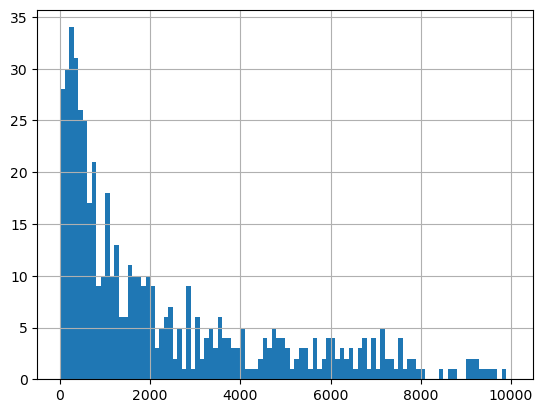

In [66]:
# Строим гистограмму распределения значений в столбце 'box_office' с 100 бинами в диапазоне от 0 до 10000
df['box_office'].hist(bins=100, range=(0, 10000));

In [67]:
# Вывести все строки, где значение в столбце 'box_office' меньше 1000
df[df['box_office'] < 1000].shape[0]

231

Удалим строки где в столбце `box_office` указаны нулевые значения.

In [68]:
df.drop(df[df['box_office'] == 0].index, inplace=True)

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 2.5:** 

В процессе анализа количественных данных выявлены следующие особенности:

- ***Рейтинг фильма:***
В данных не замечено аномальных значений. В рейтинге присутствуют пропущенные значения. Данные были ранее отработаны. 
- ***Бюджет фильма:***
Обнаружены строки, где бюджет фильма равен 0. Эти записи были удалены, поскольку в них отсутствует информация о бюджете, и его рассчитать невозможно.
- ***Сборы по фильмам (box_office):***
Выявлены строки с нулевыми сборами, и они также были удалены, поскольку не предоставляют информации о финансовом успехе фильма.
- ***Государственная поддержка (refundable_support, nonrefundable_support):***
Замечено, что в фильмах без государственной поддержки отсутствуют данные о бюджете фильма. Это важно учитывать при анализе, так как для таких фильмов отсутствует информация о финансовой составляющей.

С учетом этого стоит отметить, что столбец `budget` представляет собой общий бюджет фильма, включая как возвратные, так и невозвратные средства государственной поддержки. Таким образом, `budget` объединяет в себе информацию о полном объеме финансирования, включая сумму, которую можно вернуть `(refundable_support),` и сумму, которая остается невозвращаемой `(nonrefundable_support).` Это важное уточнение следует учесть при интерпретации данных о бюджете фильмов.


*Важно отметить, что малые значения в столбце `box_office` могут иметь различные причины. Одной из возможных причин является указание суммы в валюте, отличной от рубля, либо возможно ошибка при вводе данных. В таких случаях интерпретацию суммы следует проводить с осторожностью, и, возможно, потребуется конвертация валюты или дополнительные проверки для корректного анализа финансовых показателей фильмов.*

### Добавление новых столбцов

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [69]:
# Для рассчета года, применим метод .dt.year и сохраним это в новый стлобец show_year
df['show_year'] = df['show_start_date'].dt.year

# Проверим данные в новом столбце, для этого выведем первые 5 строк
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,"ФГУП ""Киноконцерн Мосфильм""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [70]:
# Функция для извлечения первых значений из списка
def extract_first_value(lst):
    if isinstance(lst, str):
        return lst.split(',')[0].strip()  # Извлекаем первое значение (удаляем лишние пробелы)
    else:
        return None

# Применение функций к столбцам и создание новых столбцов
df['director_first_name'] = df['director'].apply(extract_first_value)
df['genre_primary'] = df['genres'].apply(extract_first_value)
df['producer_first_name'] = df['producer'].apply(extract_first_value)
df['film_studio_primary'] = df['film_studio'].apply(extract_first_value)

# Проверим результат
df.head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,director_first_name,genre_primary,producer_first_name,film_studio_primary
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,Дэвид Валдес,Тачстоун Пикчерз
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,"ФГУП ""Киноконцерн Мосфильм""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,"ФГУП ""Киноконцерн Мосфильм""","Киностудия ""Мосфильм"""
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,Джим Лемли,Юниверсал Пикчерз
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,Джим Лемли,Юниверсал Пикчерз
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,Джим Лемли,Юниверсал Пикчерз
5,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,"ФГУП ""Киноконцерн Мосфильм""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2016,В.Абдрашитов,драма,"ФГУП ""Киноконцерн Мосфильм""","Киностудия ""Мосфильм"""
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,"ФГУП ""Киноконцерн Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0,2013,В.Меньшов,мелодрама,"ФГУП ""Киноконцерн Мосфильм""","Киностудия ""Мосфильм"""
7,Любовь и сигареты,221074614,2014-12-29,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл,Джон Пенотти,Юнайтед Артистс
8,Отпетые мошенники.,121011416,2016-05-05,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN,2016,Эрик Беснард,комедия,Патрис Леду,Пульсар Продюксьон
9,Отпуск за свой счет,111019114,2014-12-01,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР,Венгрия",В.Титов,"ФГУП ""Киноконцерн Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN,2014,В.Титов,мелодрама,"ФГУП ""Киноконцерн Мосфильм""","Киностудия ""Мосфильм"""


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [71]:
# Создаем новый столбец 'government_support_ratio'
df['government_support_ratio'] = ((df['refundable_support'] + df['nonrefundable_support']) / df['budget']).round(3)

# Проверим результат
df[df['budget'] > 0].head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,director_first_name,genre_primary,producer_first_name,film_studio_primary,government_support_ratio
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,А.Атанесян,"АНО содействия развитию кинематографии ""Ангел-...",0.334
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,неизвестно,28140.0,2014,А.Якимчук,неизвестно,А.Тютрюмов,"ООО ""Компания ""АТК-Студио""",0.700
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,Р.Давлетьяров,"ООО ""Компания ""РЕАЛ-ДАКОТА""",0.613
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,Л.Антонова,"ООО ""Студия ""Пассажир""",0.690
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,А.Миндадзе,"ООО ""Студия ""Пассажир""",0.625
1854,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,25000000.0,51850000.0,Министерство культуры,6.1,"мультфильм,фэнтези,история",15078858.6,2015,С.Серегин,мультфильм,А.Герасимов,"ООО ""Студия ""Мастер-Фильм""",0.482
1870,А зори здесь тихие..._,111002915,2015-03-16,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,неизвестно,«12+» - для детей старше 12 лет,50000000.0,100000000.0,220588394.0,Фонд кино,8.5,"драма,военный,история",249166767.7,2015,Р.Давлетьяров,драма,неизвестно,"ООО ""Компания ""Реал-Дакота""",0.680
1871,Две женщины,111013714,2014-10-02,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия,Франция,Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,46502299.0,86210067.0,"Министерство культуры, Фонд кино",6.7,драма,4731239.5,2014,В.Глаголева,драма,Н.Иванова,"ООО ""Продюсерский Центр ""Хорошо Продакшн""",0.539
1903,Призрак_.,111001815,2015-03-02,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,75000000.0,139551503.0,Фонд кино,7.0,"триллер,боевик,приключения",352804320.4,2015,А.Войтинский,триллер,С.Сельянов,"ООО ""Водород 2011""",0.537
1912,Ведьма .,111002215,2015-03-05,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.0,34000000.0,48571430.0,Министерство культуры,7.4,"фэнтези,приключения,драма",51907.5,2015,Д.Федоров,фэнтези,В.Сидоренко,"ООО ""Кинокомпания ""Ракурс""",0.700


**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 2.6:** 
- ***Год проката:*** Создан новый столбец `show_year,` в котором указан год проката фильма.

- ***Главный режиссер и основной жанр:*** Созданы два новых столбца `director_first_name` и `genre_primary,` в которых указаны, соответственно, имя и фамилия главного режиссера, а также основной жанр фильма.

- ***Государственная поддержка:*** Рассчитан новый столбец `'government_support_ratio,` отражающий долю государственной поддержки от общего бюджета фильма.

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 2 "ПРЕДОБРАБОТКА ДАННЫХ":** 

В ходе анализа и предобработки данных было сделано следующее:

- Типы данных проверены, большинство столбцов содержат подходящие типы.
- Столбец `show_start_date` преобразован для удобства работы с датами.
- Обработаны уникальные значения в `ratings.`
- Решены пропуски и ошибки в `pu_number, film_studio, director, producer, genres, ratings, financing_source, box_office.`
- Лишние пробелы удалены, категориальные данные очищены.
- Неявные дубликаты в `producer и director` выявлены.
- Обработаны рейтинги, удалены записи с бюджетом и сборами равными 0.
- Учтено отсутствие данных о бюджете у фильмов без господдержки.
- Созданы новые столбцы для года проката, главного режиссера и основного жанра.
- Рассчитана доля господдержки от общего бюджета фильма.

## Исследовательский анализ данных


### Количество фильмов вышедших в прокат по годам

- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.

Сгруппируем данные по годам.

In [72]:
# Группировка данных по годам проката
avg_box_office_ratio_per_year = (df.groupby('show_year')
   # Подсчет общего количества фильмов для каждого года
   .agg(total_films=('show_year', 'count'), 
        # Подсчет количества фильмов с известными данными о прокате для каждого года
        film_count_show_year=('box_office', 'count'))
   # Добавление столбца с долей фильмов с известными данными о прокате относительно общего количества фильмов
   .assign(box_office_films_ratio=lambda x: x['film_count_show_year'] / x['total_films'])
   # Сброс индекса, чтобы привести DataFrame к более удобному виду
   .reset_index()
)

avg_box_office_ratio_per_year

,show_year,total_films,film_count_show_year,box_office_films_ratio
0,2010,980,101,0.103061
1,2011,622,109,0.175241
2,2012,588,123,0.209184
3,2013,625,179,0.286400
4,2014,799,272,0.340426
5,2015,696,456,0.655172
6,2016,814,522,0.641278
7,2017,503,355,0.705765
8,2018,887,471,0.531003
9,2019,929,529,0.569429


Построим гистограмму для фильмов имеющие прокатные удостоверения по годам

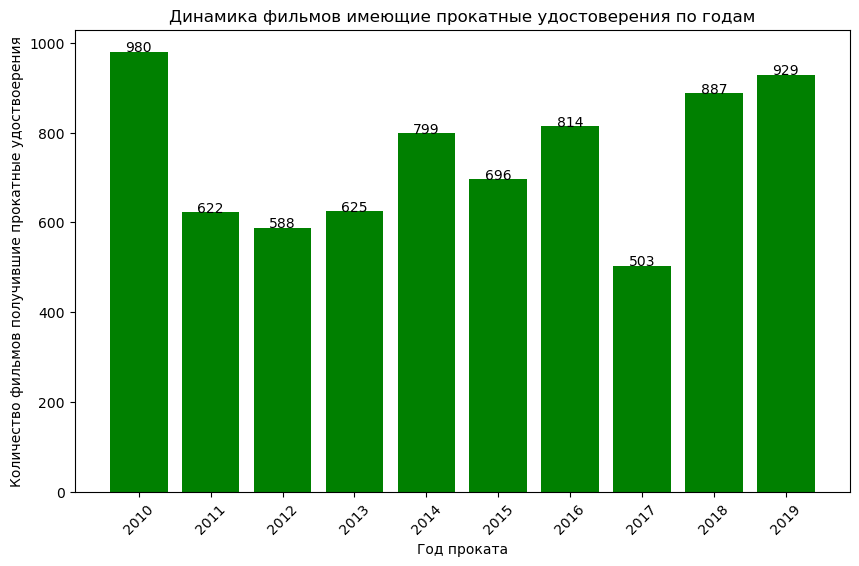

In [73]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.bar(avg_box_office_ratio_per_year['show_year'], avg_box_office_ratio_per_year['total_films'], color='green')
plt.xlabel('Год проката')
plt.ylabel('Количество фильмов получившие прокатные удоствоерения')
plt.title('Динамика фильмов имеющие прокатные удостоверения по годам')

# Добавление подписей для каждого столбца
for i, value in zip(avg_box_office_ratio_per_year['show_year'], avg_box_office_ratio_per_year['total_films']):
    plt.text(i, value + 0.005, f'{value}', ha='center')

# Установка подписей и поворот названий годов на 45 градусов
plt.xticks(avg_box_office_ratio_per_year['show_year'], rotation=45)

plt.show()

Построим гистограмму доли фильмов с известными данными о прокате относительно общего количества фильмов

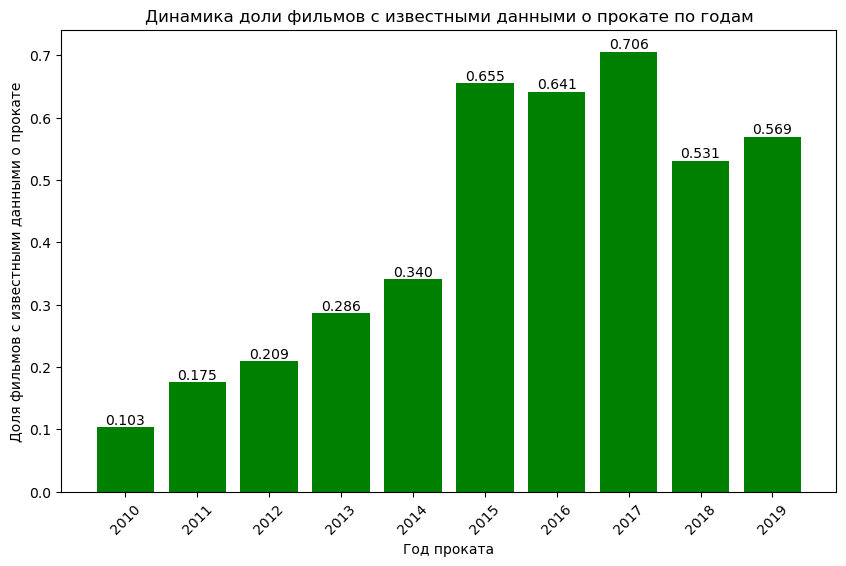

In [74]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.bar(avg_box_office_ratio_per_year['show_year'], avg_box_office_ratio_per_year['box_office_films_ratio'], color='green')
plt.xlabel('Год проката')
plt.ylabel('Доля фильмов с известными данными о прокате')
plt.title('Динамика доли фильмов с известными данными о прокате по годам')

# Добавление подписей для каждого столбца
for i, value in zip(avg_box_office_ratio_per_year['show_year'], avg_box_office_ratio_per_year['box_office_films_ratio']):
    plt.text(i, value + 0.005, f'{value:.3f}', ha='center')

# Установка подписей и поворот названий годов на 45 градусов
plt.xticks(avg_box_office_ratio_per_year['show_year'], rotation=45)

plt.show()

**Вывод:**

Согласно полученным результатам, наибольшее число фильмов получившие прокатные удостоверения было в 2010 году, а минимальное в 2017. в остальные годы заметна тенденция роста от года к году. Также согласно доли фильмов с известными данными о прокате по годам можно сделать следующие предположения:
- Доля фильмов получившая кассовые сборы растет из года в год;
- Большинство фильмов получившие прокатные удостоверения до 2015 года не выходили в кинотеатрах;
- Доля фильмов получившая кассовые сборы резко выросло с 2015 года:
    - В это время получило развитие онлайн кинотеатров в РФ;
    - С каждым годом доля пиртаства уменьшается;
    - В прокат поступило больше фильмов, так как на это повлияли события в 2014 (возврат Крыма в состав РФ), тем самым увеличилось число отечественных премьер.
- Падение доля фильмов получившие кассовые сборы после 2017 может быть связано с изменением правил получения прокатного удостоверения.

### Динамика проката фильмов по годам

- Изучис, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Сгруппируем данные по годам, и ввыведм суммарные значения столбца `box_office`

In [75]:
total_box_office_per_year = df.groupby('show_year')['box_office'].sum().reset_index()
total_box_office_per_year 

,show_year,box_office
0,2010,2.428654e+06
1,2011,1.410276e+07
2,2012,6.955423e+06
3,2013,2.979971e+07
4,2014,7.434718e+09
5,2015,3.852783e+10
6,2016,4.674232e+10
7,2017,4.845815e+10
8,2018,4.925199e+10
9,2019,4.827810e+10


C:\Users\Asus\anaconda3\envs\practicum\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\envs\practicum\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


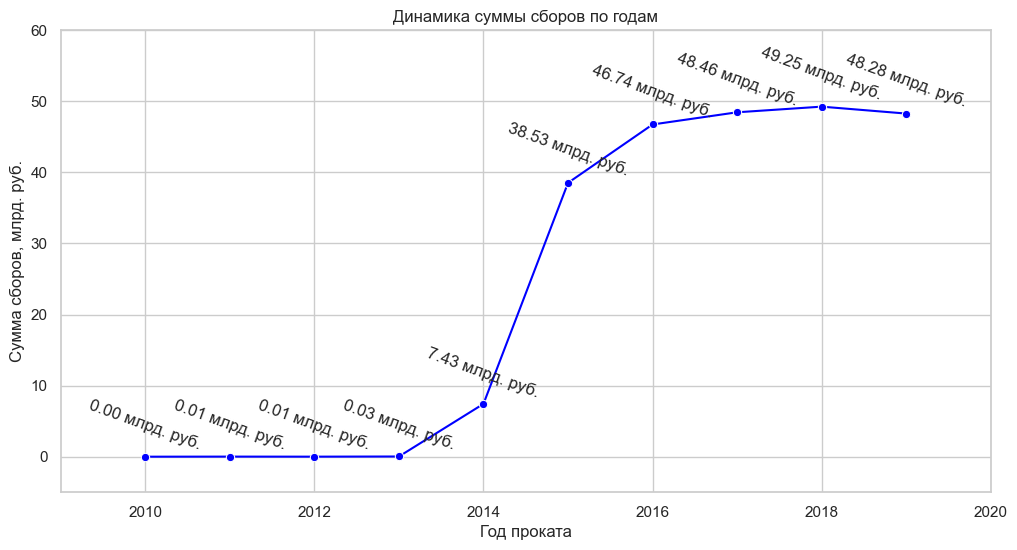

In [76]:
# Преобразование суммы сборов в миллионы
total_box_office_per_year['box_office_billion'] = total_box_office_per_year['box_office'] / 1e9

# Настройка стиля Seaborn
sns.set(style="whitegrid")

# Создание графика
plt.figure(figsize=(12, 6))
sns.lineplot(x='show_year', y='box_office_billion', data=total_box_office_per_year, marker='o', color='blue')

# Добавление подписей к точкам
for i, txt in enumerate(total_box_office_per_year['box_office_billion']):
    plt.annotate(f'{txt:.2f} млрд. руб.', (total_box_office_per_year['show_year'][i], txt), textcoords="offset points", 
                 xytext=(0,5), ha='center', rotation=340)

# Добавление подписей и заголовка
plt.xlabel('Год проката')
plt.ylabel('Сумма сборов, млрд. руб.')
plt.title('Динамика суммы сборов по годам')

# Изменение диапазона по Y
plt.ylim(-5, 60)
# Изменение диапазона по Х
plt.xlim(2009, 2020)

# Отображение графика
plt.show()

In [77]:
# Год с минимальными сборами
min_year, min_value = df.groupby('show_year')['box_office'].sum().idxmin(), df.groupby('show_year')['box_office'].sum().min()

# Год с максимальными сборами
max_year, max_value = df.groupby('show_year')['box_office'].sum().idxmax(), df.groupby('show_year')['box_office'].sum().max()

# Вывод результатов
print(f"Год с минимальными сборами: {min_year} (Сборы: {min_value / 100000:.2f} млн. руб.)")
print(f"Год с максимальными сборами: {max_year} (Сборы: {max_value / 100000:.2f} млн. руб.)")

Год с минимальными сборами: 2010 (Сборы: 24.29 млн. руб.)
Год с максимальными сборами: 2018 (Сборы: 492519.91 млн. руб.)


**Вывод:**
На основе полученных результатов можно сделать вывод, что до 2013 года данные по сборам не актуальны, так как суммы уж слишком малы. Данные после 2014 свидетельствуют от стабильном приросте который коррелируется с приростом количества прокатных удостоверений в эти же года. Год с **максимальными сборами** - 2018, при этом сборы составили - 49,25 млрд. руб. А год с **минимальными сборами**, без учета данных до 2014 года - 2014, при этом сборы составили - 7,43 млрд. руб.

### Рассчет средней и медианной суммы сборов по годам

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

Сгруппируем данные по годам, и ввыведм среднее и медианные значения столбца `box_office`

In [78]:
box_office_stats = df.groupby('show_year')['box_office'].agg(['mean', 'median']).reset_index()
box_office_stats

,show_year,mean,median
0,2010,2.404608e+04,1710.00
1,2011,1.293832e+05,3000.00
2,2012,5.654815e+04,6220.00
3,2013,1.664788e+05,3580.00
4,2014,2.733352e+07,20310.00
5,2015,8.449085e+07,4864744.05
6,2016,8.954467e+07,3777202.68
7,2017,1.365018e+08,9919415.00
8,2018,1.045690e+08,8751895.75
9,2019,9.126295e+07,4601033.60


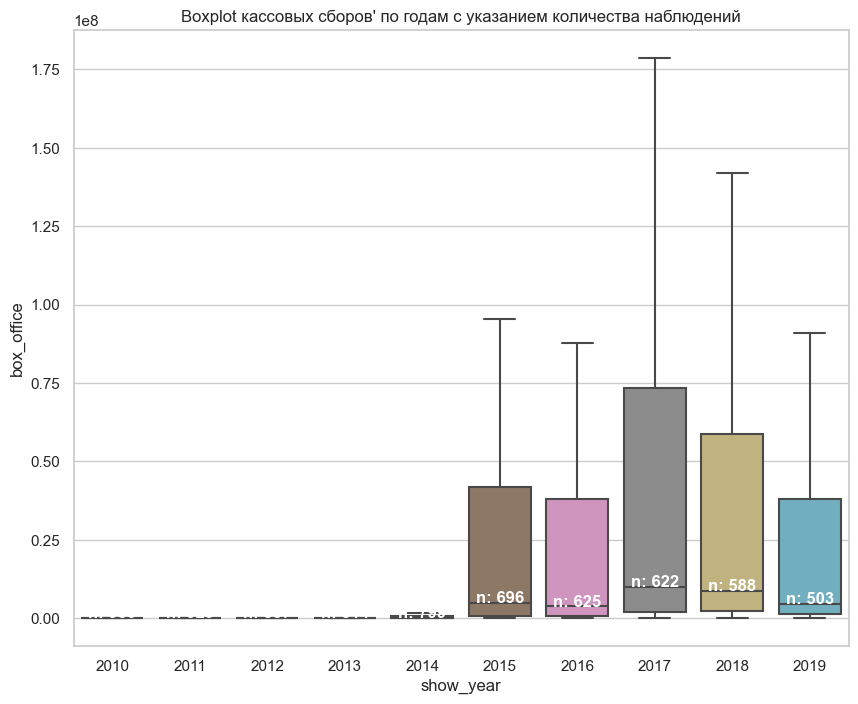

In [79]:
# Начнем с базового boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='show_year', y='box_office', data=df, showfliers=False)

# Рассчитаем количество наблюдений (nobs) и медиану для размещения меток
medians = df.groupby('show_year')['box_office'].median().reset_index(name='medians')
nobs = df['show_year'].value_counts().reset_index(name='counts')

# Добавим количество наблюдений к графику
pos = range(len(nobs))
for tick, label in zip(pos, plt.gca().get_xticklabels()):
    plt.text(pos[tick], medians['medians'].iloc[tick] + 0.4, f'n: {nobs["counts"].iloc[tick]}', 
             horizontalalignment='center', size='medium', color='w', weight='semibold')

# Добавим заголовок
plt.title("Boxplot кассовых сборов' по годам с указанием количества наблюдений", loc="center")

# Покажем график
plt.show()

C:\Users\Asus\anaconda3\envs\practicum\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\envs\practicum\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\envs\practicum\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\envs\practicum\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

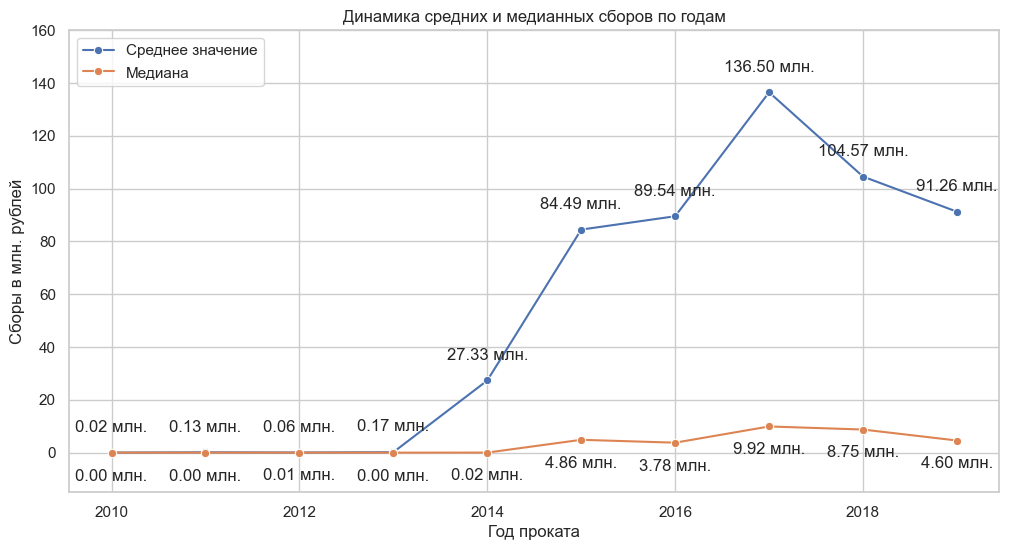

In [80]:
# Преобразование сборов в миллионы
box_office_stats['mean_million'] = box_office_stats['mean'] / 1e6
box_office_stats['median_million'] = box_office_stats['median'] / 1e6

# Создание графика
plt.figure(figsize=(12, 6))
sns.lineplot(x='show_year', y='mean_million', data=box_office_stats, marker='o', label='Среднее значение')
sns.lineplot(x='show_year', y='median_million', data=box_office_stats, marker='o', label='Медиана')

# Добавление подписей к точкам для среднего значения (снизу)
for i, txt in enumerate(box_office_stats['mean_million']):
    plt.annotate(f'{txt:.2f} млн.', (box_office_stats['show_year'][i], txt), 
                 textcoords="offset points", xytext=(0,15), ha='center')

# Добавление подписей к точкам для медианы (сверху)
for i, txt in enumerate(box_office_stats['median_million']):
    plt.annotate(f'{txt:.2f} млн.', (box_office_stats['show_year'][i], txt), 
                 textcoords="offset points", xytext=(0,-20), ha='center')


# Настройка подписей и заголовка
plt.xlabel('Год проката')
plt.ylabel('Сборы в млн. рублей')
plt.title('Динамика средних и медианных сборов по годам')
plt.legend(loc='upper left')

# Изменение диапазона по Y
plt.ylim(-15, 160)

# Отображение графика
plt.show()

**Вывод:**

На основе данных о средних и медианных значениях столбца `box_office` для каждого года можно сделать следующие выводы:

- **Динамика сборов по годам:**
    - Медианные значения: В 2010 году и 2011 году медианное значение сборов находится на относительно низком уровне. С 2013 года начинается рост, и в 2014 году происходит резкий скачок, что свидетельствует о высоких сборах нескольких фильмов. После 2014 года медиана снова снижается, но остается на более высоком уровне по сравнению с началом периода. Из данных можно выделить, что в 2017 году отмечается наилучший показатель, где каждый вышедший в кинотеатре фильм в этом году заработал в среднем 9.9 млн. рублей.
    - Средние значения: Средние значения сборов более чувствительны к выбросам, и резкий скачок в 2014 году оказывает значительное влияние на средние значения. В последующие годы средние сборы остаются на высоком уровне.
- **Выбросы и аномалии:**
В 2014 году заметен значительный выброс в данных, что объясняет резкий скачок в средних и медианных значениях. Необходимо более подробно исследовать данные за этот период и выявить фильмы, которые способствовали этому скачку.
- **Динамика кинопроката:**
В целом, динамика кинопроката по сборам в России показывает устойчивый рост с 2012 года. Однако важно учитывать, что сборы могут сильно зависеть от успешных кинопремьер и других факторов, влияющих на привлекательность фильмов для зрителей.
- **Анализ влияния фильмов с высокими сборами:**
При дальнейшем анализе желательно исследовать фильмы с высокими сборами в 2014 году и более поздние года, чтобы выявить особенности этих фильмов и понять, какие факторы влияют на успешность.
- **Сравнение медианы и среднего:**
Сравнение медианных и средних значений помогает оценить устойчивость данных. Поскольку средние значения более подвержены воздействию выбросов, медианы часто используются для оценки центральной тенденции в данных о сборах. Медианное значение по кассовым сборам существенно отличается от среднего значения за каждый год. Это указывает на присутствие фильмов с высокими сборами, которые оказывают сильное влияние на среднюю величину. В целом, для оценки финансовой успешности вышедших фильмов рекомендуется использовать медианное значение, так как оно менее чувствительно к воздействию выбросов и более репрезентативно для большинства фильмов.

*Как и в предыдущем выводе данные до 2013 года можно считать не корректными.*

### Влияние возрастной категории на сборы фильмов в прокате

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.

Создадим список для сортировки по оси Х и отфильтрованный датафрейм

In [81]:
# Указание порядка категорий на оси X
order = ['«0+» - для любой зрительской аудитории', '«6+» - для детей старше 6 лет', 
         '«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет', 
         '«18+» - запрещено для детей']

# Фильтрация данных за период с 2015 по 2019 год
filtered_data = df.query('show_year >= 2015')

# Выведем сводную таблицу по доходам
total_box_office = (
    filtered_data.groupby('age_restriction')['box_office']
    .sum()
    .sort_values(ascending=False)
    / 1e9  # Деление на 1 миллиард
)

total_box_office

age_restriction
«16+» - для детей старше 16 лет           75.102266
«12+» - для детей старше 12 лет           59.369190
«6+» - для детей старше 6 лет             55.220193
«18+» - запрещено для детей               40.757658
«0+» - для любой зрительской аудитории     0.809077
Name: box_office, dtype: float64

In [82]:
# Выведем сводную таблицу по доходам
count_box_office = (
    filtered_data.groupby('age_restriction')['box_office']
    .count()
    .sort_values(ascending=False)
)

count_box_office

age_restriction
«16+» - для детей старше 16 лет           797
«18+» - запрещено для детей               791
«12+» - для детей старше 12 лет           344
«6+» - для детей старше 6 лет             311
«0+» - для любой зрительской аудитории     90
Name: box_office, dtype: int64

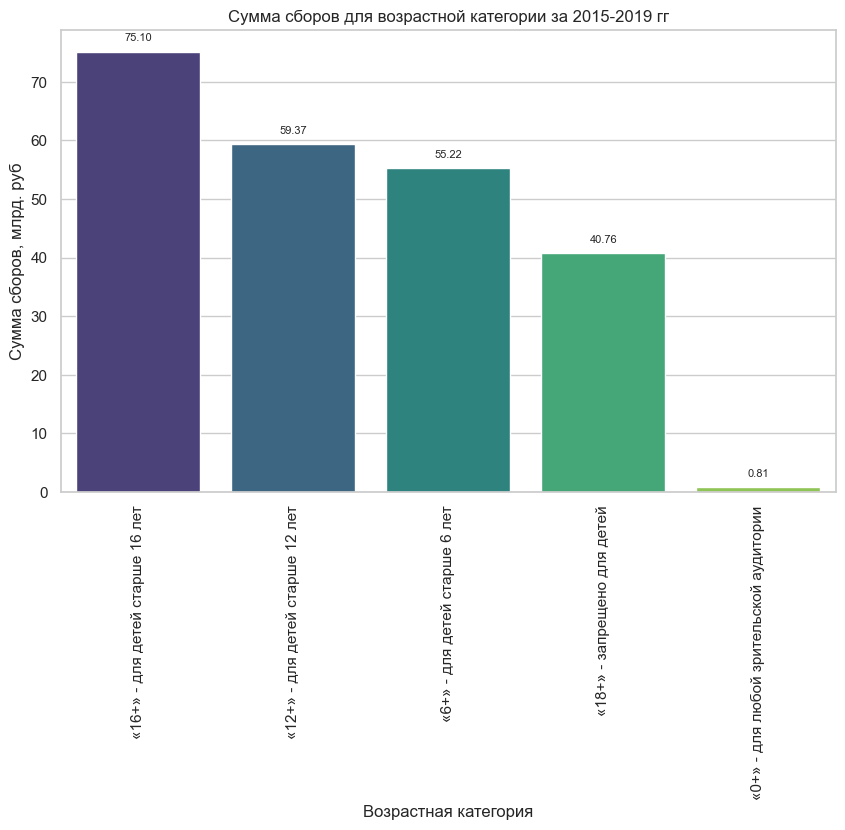

In [83]:
# Настройка стиля Seaborn
sns.set(style="whitegrid")

# Создание более красивого барплота
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=total_box_office.index, y=total_box_office.values, palette="viridis")

# Добавление подписей к столбцам
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Поворот подписей по оси X на 90 градусовindex
plt.xticks(rotation=90)
    
# Добавление заголовка и меток
plt.title('Сумма сборов для возрастной категории за 2015-2019 гг')
plt.xlabel('Возрастная категория')
plt.ylabel('Сумма сборов, млрд. руб')

# Отображение графика
plt.show()

Построим boxplot для возрастных категорий

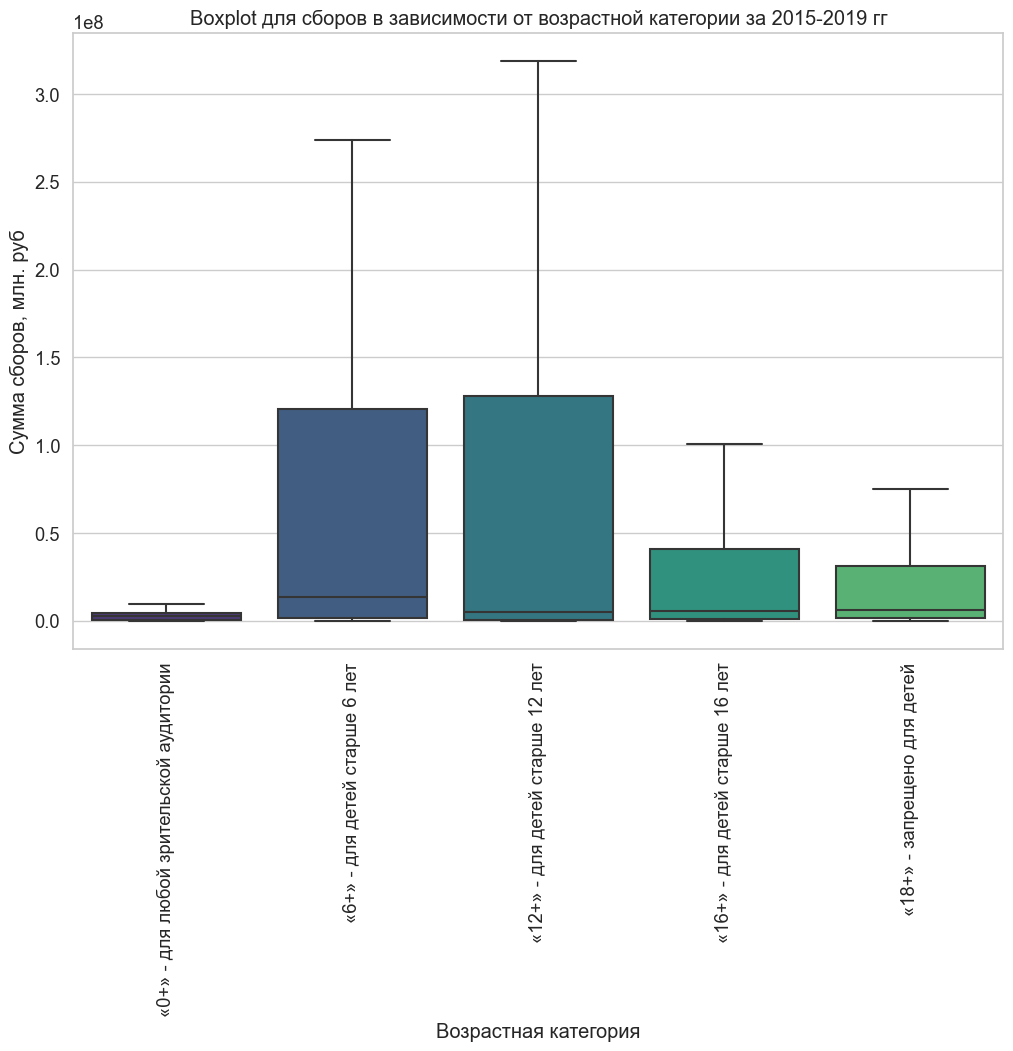

In [84]:
# Настройка стиля Seaborn
sns.set(style="whitegrid", palette="viridis", font_scale=1.2)

# Создание более красивого boxplot
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(x='age_restriction', y='box_office', data=filtered_data, showfliers=False, order=order)

# Добавление заголовка и меток
plt.title('Boxplot для сборов в зависимости от возрастной категории за 2015-2019 гг')
plt.xlabel('Возрастная категория')
plt.ylabel('Сумма сборов, млн. руб')

# Поворот подписей по оси X на 90 градусов
plt.xticks(rotation=90)

# Отображение графика
plt.show()

C:\Users\Asus\anaconda3\envs\practicum\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


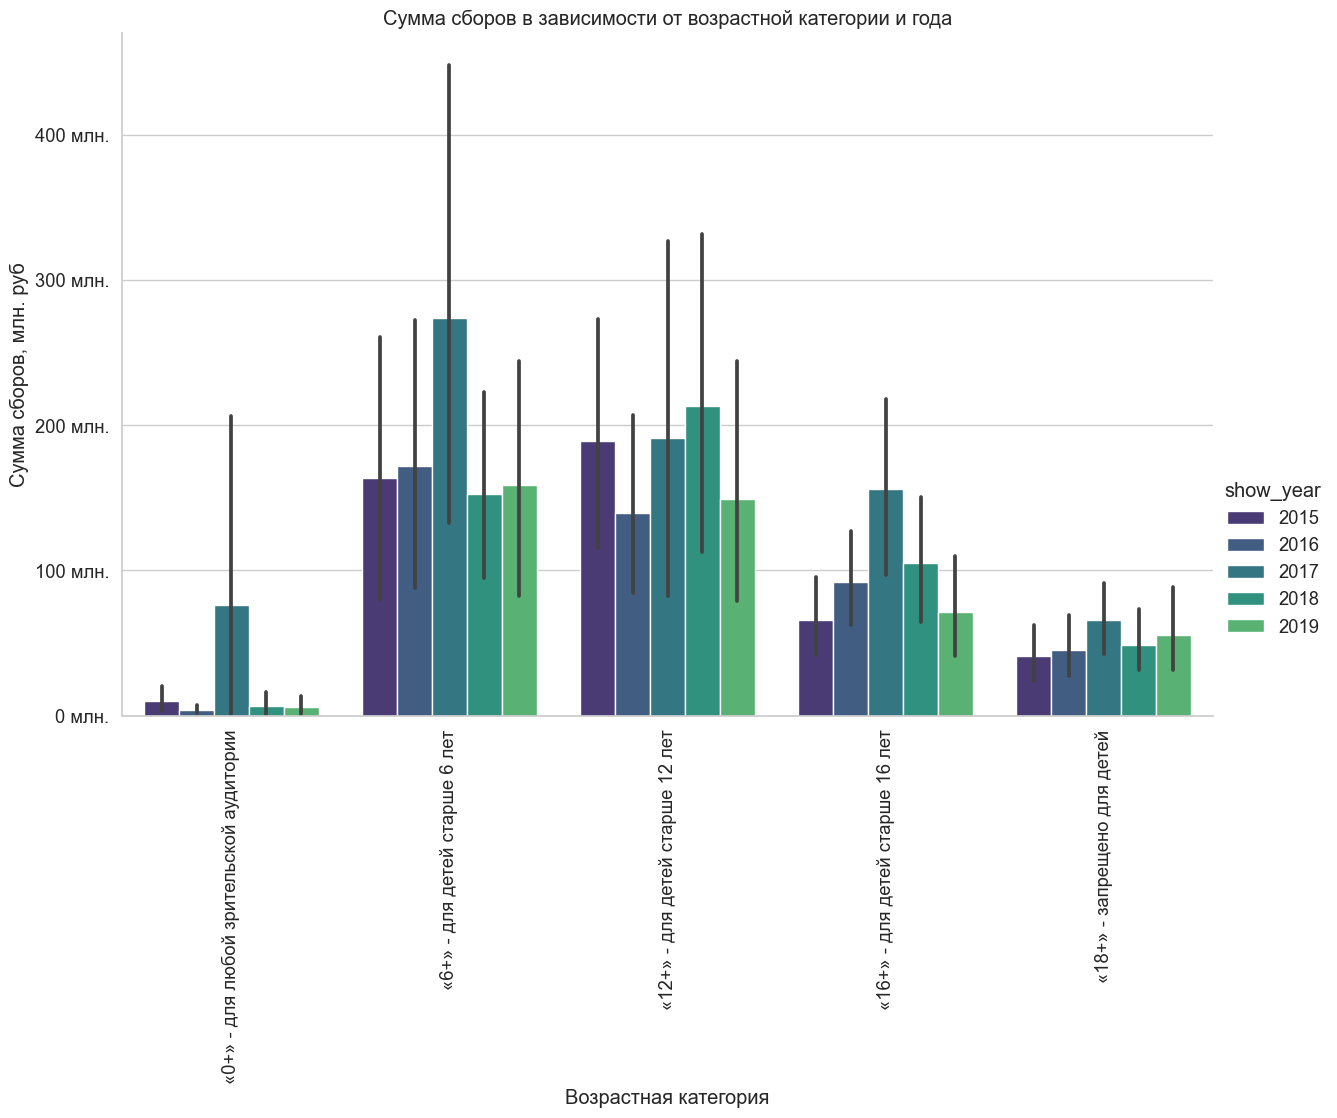

In [85]:
# Настройка стиля Seaborn
sns.set(style="whitegrid", palette="viridis", font_scale=1.2)

# Создание более красивого catplot для разных годов
boxplot_age_per_year = sns.catplot(x='age_restriction', y='box_office', hue='show_year', data=filtered_data, kind='bar', height=8, aspect=1.5, order=order)

# Добавление заголовка и меток
plt.title('Сумма сборов в зависимости от возрастной категории и года')
plt.xlabel('Возрастная категория')
plt.ylabel('Сумма сборов, млн. руб')

# Перевод подписей оси Y в миллионы
formatter = plt.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f} млн.')
boxplot_age_per_year.ax.yaxis.set_major_formatter(formatter)

# Поворот подписей по оси X на 90 градусов
plt.xticks(rotation=90)

# Отображение графика
plt.show()

In [86]:
# Вывод сводной таблицы в млн. рублей
(filtered_data.groupby(['age_restriction', 'show_year'])['box_office'].agg(['median', 'mean']).unstack() / 1e6).round(2)

median                             \
show_year                                2015  2016   2017   2018   2019   
age_restriction                                                            
«0+» - для любой зрительской аудитории   2.95  2.57  22.18   3.62   3.89   
«12+» - для детей старше 12 лет         15.35  4.23   9.01   8.93   3.41   
«16+» - для детей старше 16 лет          4.45  5.13   9.64   8.75   3.21   
«18+» - запрещено для детей              4.65  6.11   8.21   7.18   5.60   
«6+» - для детей старше 6 лет           19.51  3.03  50.27  14.46  12.53   

                                          mean                                  
show_year                                 2015    2016    2017    2018    2019  
age_restriction                                                                 
«0+» - для любой зрительской аудитории    9.98    3.66   76.53    6.49    5.92  
«12+» - для детей старше 12 лет         189.01  139.38  191.50  212.94  149.18  
«16+» - для детей старше 16 лет          65.74   92.19  155.79  105.02   71.65  
«18+» - запрещено для детей              41.45   44.99   65.66   48.94   55.31  
«6+» - для детей старше 6 лет           163.79  172.19  273.43  152.52  158.81

Создадим сводную таблицу для возрастных категорий и вычислим для них медианные и средние значения. Построим гистограммы возрастных категорий, для этого создадим функцию для постройки этих гистограмм.

In [87]:
# Группировка данных по возрастным ограничениям и расчет медианы и среднего сборов
age_restriction_stats = (
    filtered_data.groupby('age_restriction')['box_office']
    .agg(['median', 'mean'])
    .sort_values(by='median', ascending=False)
    / 1e6  # Перевод в миллионы
)

# Отобразим сводную гистограмму
display(age_restriction_stats)

# Группировка данных по возрастным ограничениям и расчет медианы сборов
median_box_office = (
    filtered_data.groupby('age_restriction')['box_office']
    .median()
    .sort_values(ascending=False)
)

# Группировка данных по возрастным ограничениям и расчет средних сборов
mean_box_office = (
    filtered_data.groupby('age_restriction')['box_office']
    .mean()
    .sort_values(ascending=False)
)

# Создадим функцию для создания гистограмм
def bild_hist(df, title):
    # Настройка стиля Seaborn
    sns.set(style="whitegrid")

    # Создание более красивого барплота
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=df.index, y=df.values, palette="viridis", order=order)

    # Добавление подписей к столбцам
    for p in barplot.patches:
        barplot.annotate(f'{p.get_height() / 1000000:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

    # Поворот подписей по оси X на 90 градусовindex
    plt.xticks(rotation=90)
    
    # Добавление заголовка и меток
    plt.title(title)
    plt.xlabel('Возрастная категория')
    plt.ylabel('Сумма сборов, млн. руб')

    # Отображение графика
    plt.show()

,median,mean
age_restriction,,
«6+» - для детей старше 6 лет,13.596323,177.556891
«18+» - запрещено для детей,6.164575,51.526748
«16+» - для детей старше 16 лет,5.477552,94.231199
«12+» - для детей старше 12 лет,4.928678,172.584854
«0+» - для любой зрительской аудитории,2.949627,8.989749


Построим гистограммы возрастных категорий

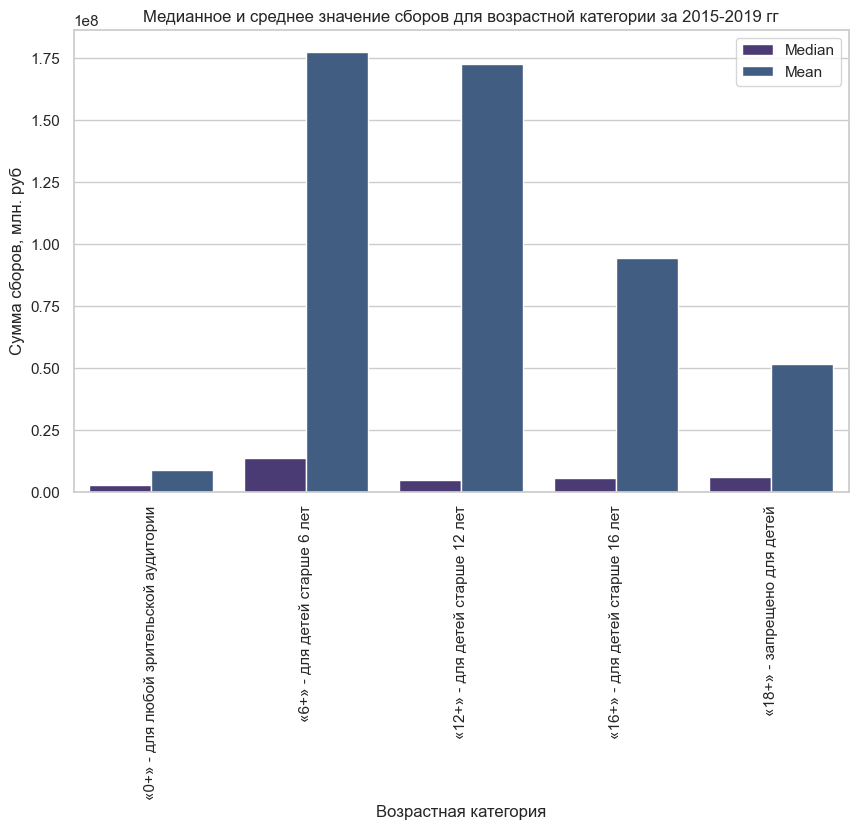

In [88]:
# Создание DataFrame с медианами и средними значениями
bar_data = pd.DataFrame({
    'Age Restriction': np.concatenate([median_box_office.index, mean_box_office.index]),
    'Box Office': np.concatenate([median_box_office.values, mean_box_office.values]),
    'Type': ['Median'] * len(median_box_office) + ['Mean'] * len(mean_box_office)
})

# Настройка стиля Seaborn
sns.set(style="whitegrid", palette="viridis")

# Создание более красивого барплота
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Age Restriction', y='Box Office', hue='Type', data=bar_data, order=order)

# Поворот подписей по оси X на 90 градусов
plt.xticks(rotation=90)

# Добавление заголовка и меток
plt.title('Медианное и среднее значение сборов для возрастной категории за 2015-2019 гг')
plt.xlabel('Возрастная категория')
plt.ylabel('Сумма сборов, млн. руб')

# Отображение легенды
plt.legend()

# Отображение графика
plt.show()

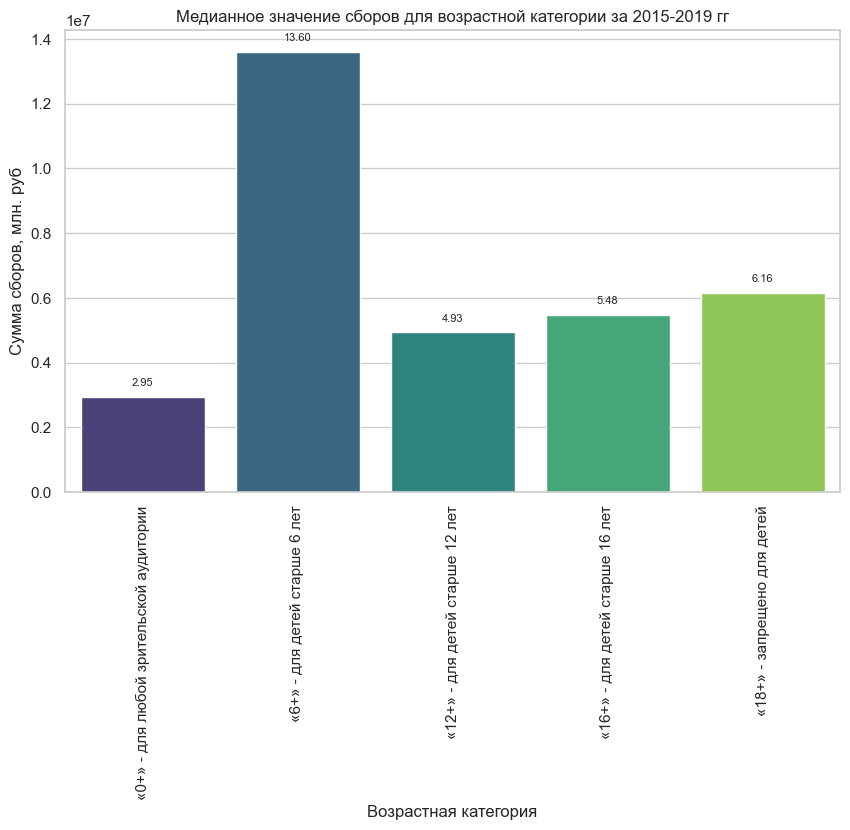

In [89]:
bild_hist(median_box_office, 'Медианное значение сборов для возрастной категории за 2015-2019 гг')

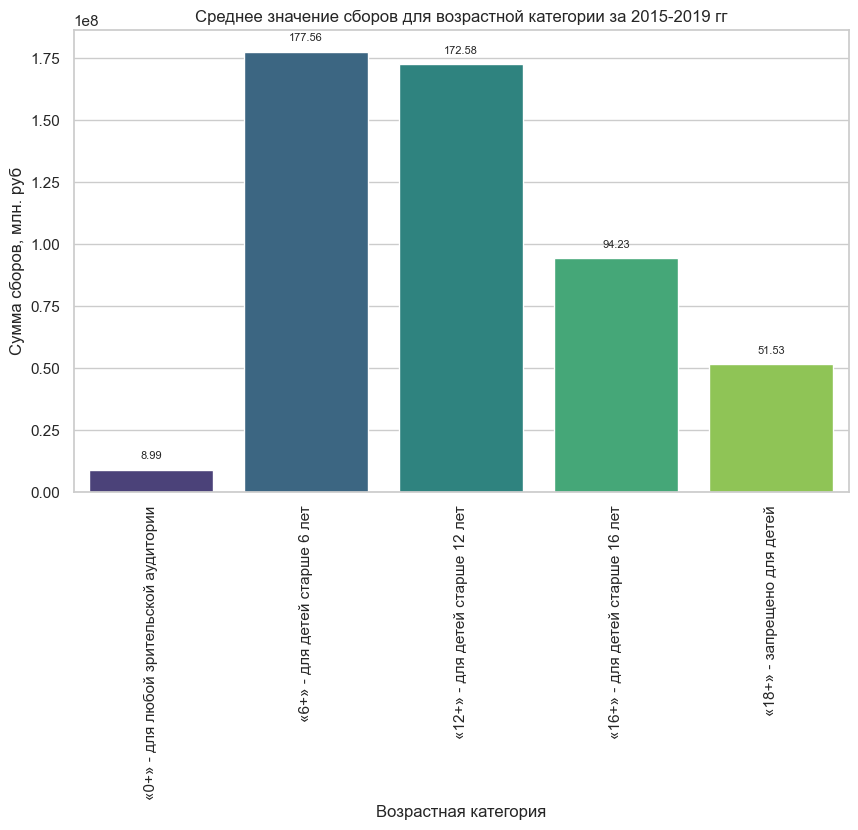

In [90]:
bild_hist(mean_box_office, 'Среднее значение сборов для возрастной категории за 2015-2019 гг')

**Вывод:**

С 2015 по 2019 год фильмы с возрастным ограничением «16+» принесли наибольший доход, составив более 75 миллиардов рублей. За ними следуют фильмы с возрастным рейтингом «12+», принеся более 59 миллиардов рублей. Вместе эти две категории собрали значительное большинство средств в прокате. На третьем месте по доходам находятся фильмы с возрастным ограничением «6+», принеся более 55 миллиардов рублей. Фильмы с возрастным рейтингом «18+» и «0+» занимают четвертое и пятое места соответственно. При этом фильмы с возрастным рейтингом «18+» собрали более 40 миллиардов рублей, в то время как фильмы с рейтингом «0+» имеют наименьший средний доход в 0.81 миллиарда рублей. В целом, фильмы с более высокими возрастными рейтингами оказываются более прибыльными, что может быть коррелировано с количеством фильмов выпущенных для каждой категории.

Анализируя средние и медианные значения сборов по возрастным категориям за период с 2015 по 2019 год, можно сделать следующие выводы:

- **«6+» - для детей старше 6 лет:**
    - Медианное значение сборов: 13.60 млн руб. (Это указывает на то, что половина фильмов в этой категории имеют более низкие сборы.)
    - Среднее значение сборов: 177.56 млн руб.
- **«18+» - запрещено для детей:**
    - Медиана сборов: 6.16 млн руб.
    - Среднее значение сборов: 51.53 млн руб.
- **«16+» - для детей старше 16 лет:**
    - Медианное значение сборов: 5.48 млн руб.
    - Среднее значение сборов: 94.23 млн руб. (Это может быть связано с наличием успешных блокбастеров.)
- **«12+» - для детей старше 12 лет:**
    - Медиана сборов: 4.93 млн руб.
    - Среднее значение сборов: 172.58 млн руб. (Это может быть обусловлено наличием успешных фильмов с высокими сборами)
- **«0+» - для любой зрительской аудитории:** Эта категория, вероятно, включает в себя фильмы с невысокими сборами, доступные для всех зрителей, а среднее значение указывает, что также свидетельствует о наличии успешных фильмов в данной категории.
    - Медианное значение сборов: 2.95 млн руб.
    - Среднее значение сборов: 8.99 млн руб.
    
В целом, разница между средними и медианными значениями указывает на наличие небольшого числа фильмов с очень высокими сборами, что может исказить общую картину. Рассмотрение обоих показателей дает более полное представление о распределении сборов в различных возрастных категориях.

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 3 "ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ":**

- **Количество фильмов вышедших в прокат по годам Вывод:**
Согласно результатам исследования, наибольшее количество фильмов, получивших прокатные удостоверения, было в 2010 году, а минимальное – в 2017 году. В остальные годы заметна тенденция роста от года к году. Предположительно, доля фильмов, получивших кассовые сборы, также растет, что может быть связано с развитием онлайн-кинотеатров, увеличением числа отечественных премьер и другими факторами.


- **Динамика проката фильмов по годам Вывод:**
Результаты показывают стабильный прирост суммарных кассовых сборов с 2014 года. Год с максимальными сборами – 2018, а год с минимальными – 2014 (без учета данных до 2014 года). Однако данные до 2013 года могут быть не совсем корректными, так как суммы в эти годы слишком малы.


- **Рассчет средней и медианной суммы сборов по годам Вывод:** *Анализ средних и медианных значений сборов по годам позволяет выделить несколько ключевых моментов:*
С 2014 года отмечается резкий скачок в средних и медианных значениях, связанный с высокими сборами нескольких фильмов.
Средние сборы остаются на высоком уровне после 2014 года, но они более чувствительны к влиянию выбросов.
Медиана сборов в 2017 году достигает наивысшего значения, указывая на успешность каждого вышедшего в кинотеатре фильма в этом году.


- **Влияние возрастной категории на сборы фильмов в прокате Вывод:**
За период с 2015 по 2019 год фильмы с возрастным ограничением «16+» принесли наибольший доход, за ними следуют фильмы «12+» и «6+». Фильмы с возрастным рейтингом «18+» и «0+» имеют более низкий средний доход. Анализ средних и медианных значений сборов по возрастным категориям показывает различия в распределении доходов. В целом, фильмы с более высокими возрастными рейтингами оказываются более прибыльными. Разница между средними и медианными значениями указывает на наличие фильмов с очень высокими сборами, влияющих на общую картину.

Исходя из обобщенных выводов, динамика российского кинопроката свидетельствует о росте отрасли, влиянии различных факторов на успех фильмов и значительной зависимости доходов от возрастных категорий. Важно дополнительное исследование выбросов и аномалий, чтобы более точно понять факторы, влияющие на успех фильмов в России.

## Исследуем фильмы, которые получили государственную поддержку

### Предобработка данных

Для удобства анализа фильмов получившие гос. поддержку создадим новый датафрейм и поместим туда только те фильмы которые получили гос. поддержу.

In [91]:
df_sup = df.query('budget > 0').copy()

df_sup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 1281 to 7478
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title                     315 non-null    object        
 1   pu_number                 315 non-null    int32         
 2   show_start_date           315 non-null    datetime64[ns]
 3   type                      315 non-null    object        
 4   film_studio               315 non-null    object        
 5   production_country        315 non-null    object        
 6   director                  315 non-null    object        
 7   producer                  315 non-null    object        
 8   age_restriction           315 non-null    object        
 9   refundable_support        315 non-null    float64       
 10  nonrefundable_support     315 non-null    float64       
 11  budget                    315 non-null    float64       
 12  financing_source       

Подсчитаем количество пропусков

In [92]:
# подсчёт пропусков
df_sup.isna().sum()

title                        0
pu_number                    0
show_start_date              0
type                         0
film_studio                  0
production_country           0
director                     0
producer                     0
age_restriction              0
refundable_support           0
nonrefundable_support        0
budget                       0
financing_source             0
ratings                     17
genres                       0
box_office                  14
show_year                    0
director_first_name          0
genre_primary                0
producer_first_name          0
film_studio_primary          0
government_support_ratio     0
dtype: int64

Так как данных мало, попытаемся восстановить пропущенные значения с помощью данных из открытых источников.

In [93]:
# подсчёт пропусков
display(df_sup[df_sup['box_office'].isna()])

title = df_sup[df_sup['box_office'].isna()]['title'].unique()
print(title)

df_sup[df_sup['box_office'].isna()].index

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,director_first_name,genre_primary,producer_first_name,film_studio_primary,government_support_ratio
2800,Золотая рыбка (2015),111018715,2015-10-29,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0.0,25000000.0,41998984.0,Министерство культуры,6.3,драма,NaN,2015,А.Галибин,драма,Б.Токарев,"ООО ""Кинокомпания Дебют""",0.595
3337,Любовь и Сакс,111001217,2017-02-16,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0.0,10000000.0,61000000.0,Министерство культуры,5.2,мелодрама,NaN,2017,А.Сурикова,мелодрама,А.Голутва,"ООО ""ДжемСтудия""",0.164
3711,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.0,11520000.0,18706080.0,Министерство культуры,7.0,"мультфильм,приключения,детектив",NaN,2016,А.Романец,мультфильм,А.Ревва,"ООО ""Колобанга""",0.616
5661,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.0,25000000.0,44600000.0,Министерство культуры,7.2,"детский,комедия",NaN,2017,Е.Соколов,детский,"ООО ""Продюсерский центр ЕРАЛАШ""","ООО ""Продюсерский центр ЕРАЛАШ""",0.561
6476,Зима,111023518,2019-03-15,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,"З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П...",«16+» - для детей старше 16 лет,0.0,25000000.0,39700000.0,Министерство культуры,5.2,"драма,криминал",NaN,2019,С.Черников,драма,З.Болотаев,"ООО ""КиноТрест""",0.630
6709,Мальчик русский,111002619,2019-02-20,Художественный,"АО ""Ленфильм""",Россия,А.Золотухин,неизвестно,«12+» - для детей старше 12 лет,0.0,30000000.0,46941140.0,Министерство культуры,6.1,"драма,военный,история",NaN,2019,А.Золотухин,драма,неизвестно,"АО ""Ленфильм""",0.639
6968,Танец с саблями,111008619,2019-05-29,Художественный,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",Россия,Ю.Разыков,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",«16+» - для детей старше 16 лет,0.0,40000000.0,61571449.0,Министерство культуры,5.8,"драма,история,биография",NaN,2019,Ю.Разыков,драма,Р.Дишдишян,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",0.650
7009,Куратор,111010019,2019-06-13,Художественный,"ООО ""Кинокомпания Атлантик"", 20 стэпс продакшнс","Россия,Грузия",П.Левченко,Е.Филиппова,«16+» - для детей старше 16 лет,0.0,25000000.0,60668576.0,Министерство культуры,4.9,"драма,криминал,детектив",NaN,2019,П.Левченко,драма,Е.Филиппова,"ООО ""Кинокомпания Атлантик""",0.412
7180,Байкал - Сердце мира 3D,112004619,2019-11-01,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.0,3000000.0,33000000.0,Министерство культуры,8.0,семейный,NaN,2019,А.Попова,семейный,И.Добровольский,"ООО ""Продюсерский центр ""Новое Время""",0.091
7229,На Луне,111015519,2019-11-01,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0.0,35000000.0,57876000.0,Министерство культуры,6.6,"приключения,триллер",NaN,2019,Е.Михалков-Кончаловский,приключения,С.Говорухин,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",0.605


['Золотая рыбка (2015)' 'Любовь и Сакс'
 'Колобанга. Только для пользователей Интернета (26 серий)'
 'Детский юмористический киножурнал "ЕРАЛАШ", выпуски 312-323' 'Зима'
 'Мальчик русский' 'Танец с саблями' 'Куратор' 'Байкал - Сердце мира 3D'
 'На Луне' 'Кроличья лапа' 'Вторжение' 'Я свободен'
 '(Не)идеальный мужчина']


Index([2800, 3337, 3711, 5661, 6476, 6709, 6968, 7009, 7180, 7229, 7344, 7474,
       7476, 7478],
      dtype='int64')

Результат поиска: 
- Золотая рыбка (2015) - данные не найдены
- Любовь и Сакс - данные не найдены
- Колобанга. Только для пользователей Интернета (26 серий) - данные не найдены
- Детский юмористический киножурнал "ЕРАЛАШ", выпуски 312-323 - данные не найдены
- [Зима](https://www.kinopoisk.ru/film/1039764/box/) - сборы 1 437 220 руб
- [Мальчик русский](https://www.kinopoisk.ru/film/1046004/) - сборы 1 941 230 руб
- [Танец с саблями](https://www.kinopoisk.ru/film/958470/) - сборы 2 843 027 руб
- [Куратор](https://www.kinopoisk.ru/film/1261583/) - сборы 2382 дол * 65 = 157 450 руб
- [Байкал - Сердце мира 3D](https://www.kinopoisk.ru/film/1108385/) - сборы 15 582 220 руб
- [На Луне](https://www.kinopoisk.ru/film/1311137/) - сборы 1 797 260 руб
- [Кроличья лапа](https://www.kinopoisk.ru/film/1445245/) - сборы 990 510 руб (рейтинг 5.2)
- [Вторжение](https://www.kinopoisk.ru/film/1045582/) - сборы 2 158 163 150 руб
- Я свободен - данные не найдены
- [(Не)идеальный мужчина](https://www.kinopoisk.ru/film/1162847/) - сборы 1 042 262 550 руб

*Курс рубля был взят на 1 января 2019 года 1USD = 66.1RUB*

Добавим полученные результаты.

In [94]:
df_sup.loc[[6476, 6709, 6968, 7009, 7180, 7229, 7344, 7474, 7478], 
           'box_office'] = [1437220, 1941230, 2843027, 157450, 15582220, 1797260, 990510, 2158163150, 1042262550]
df_sup.loc[7344, 'ratings'] = [5.2]

Аналогично сделаем и для рейтингов

In [95]:
# подсчёт пропусков
display(df_sup[df_sup['ratings'].isna()])

title = df_sup[df_sup['ratings'].isna()]['title'].unique()
print(title)

df_sup[df_sup['ratings'].isna()].index

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,director_first_name,genre_primary,producer_first_name,film_studio_primary,government_support_ratio
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,неизвестно,2.814000e+04,2014,А.Якимчук,неизвестно,А.Тютрюмов,"ООО ""Компания ""АТК-Студио""",0.700
2146,Главный,111003415,2015-03-27,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,10000000.0,40000000.0,Министерство культуры,NaN,"фантастика,боевик,комедия",3.347500e+05,2015,Ю.Кара,фантастика,Ю.Кара,"ООО ""Киностудия ""МАСТЕР""",0.250
2150,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,«18+» - запрещено для детей,0.0,25000000.0,37371262.0,Министерство культуры,NaN,неизвестно,1.982000e+04,2015,К.Сухарьков,неизвестно,А.Новиков,"ООО ""Артлайт""",0.669
2451,ПРАЗДНИК НЕПОСЛУШАНИЯ,111016215,2015-08-28,Художественный,"АНО ""Творческая студия ""Стелла""",Россия,"В.Харченко, А.Волков",Ф.Попов,«6+» - для детей старше 6 лет,0.0,34000000.0,49071428.0,Министерство культуры,NaN,неизвестно,1.825100e+05,2015,В.Харченко,неизвестно,Ф.Попов,"АНО ""Творческая студия ""Стелла""",0.693
2817,Иерей-Сан. Исповедь самурая. ПОСТАНОВЛЕНИЕМ СУ...,111019315,2015-11-17,Художественный,"ООО ""Студия Ортодокс""",Россия,Е.Баранов,"Л.Калинский, И.Охлобыстин, Г.Палагаев",«16+» - для детей старше 16 лет,25000000.0,15000000.0,74071918.0,Фонд кино,NaN,неизвестно,1.101181e+07,2015,Е.Баранов,неизвестно,Л.Калинский,"ООО ""Студия Ортодокс""",0.540
2999,Жили-были мы,111008716,2016-05-12,Художественный,"ООО ""Русские Золотые Серии""",Россия,А.Чернакова,"А.Чернакова, Ю.Сапронов",«0+» - для любой зрительской аудитории,0.0,35000000.0,69883049.0,Министерство культуры,NaN,неизвестно,6.588700e+05,2016,А.Чернакова,неизвестно,А.Чернакова,"ООО ""Русские Золотые Серии""",0.501
3061,Первая Мировая война WWI,111000716,2016-01-25,Художественный,"ООО ""Корнер Ворк""",Россия,И.Угольников,И.Угольников,«12+» - для детей старше 12 лет,0.0,30000000.0,45538655.0,Фонд кино,NaN,неизвестно,8.781000e+04,2016,И.Угольников,неизвестно,И.Угольников,"ООО ""Корнер Ворк""",0.659
3139,Я умею вязать,111019615,2015-11-27,Художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,0.0,4700000.0,14462464.0,Министерство культуры,NaN,драма,8.013700e+05,2015,Н.Степанова при участии С.Иванова,драма,С.Кикнавелидзе,"ООО ""Белое Зеркало""",0.325
3385,О любви (2017),111018816,2016-12-28,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",Россия,В.Бортко,Н.Бортко,«16+» - для детей старше 16 лет,20000000.0,35000000.0,70086439.0,"Министерство культуры, Фонд кино",NaN,неизвестно,1.133241e+07,2016,В.Бортко,неизвестно,Н.Бортко,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",0.785
3389,Как Витька Чеснок вёз Лёху штыря в дом инвалидов,111005017,2017-06-30,Художественный,"ООО ""Продюсерский центр ""ВГИК - Дебют""",Россия,А.Хант,"В.Мадышев, Ф.Попов",«18+» - запрещено для детей,0.0,25000000.0,38500000.0,Министерство культуры,NaN,неизвестно,5.503875e+06,2017,А.Хант,неизвестно,В.Мадышев,"ООО ""Продюсерский центр ""ВГИК - Дебют""",0.649


['Бесславные придурки' 'Главный' 'РЕВЕРБЕРАЦИЯ' 'ПРАЗДНИК НЕПОСЛУШАНИЯ'
 'Иерей-Сан. Исповедь самурая. ПОСТАНОВЛЕНИЕМ СУДЕБНОГО ПРИСТАВА-ИСПОЛНИТЕЛЯ Волкова Р.Н. от 25.08.2020 (к ИП №47195/20/50060-ИП) НАЛОЖЕН ЗАПРЕТ НА СОВЕРШЕНИЕ РЕГИСТРАЦИОННЫХ ДЕЙСТВИЙ В ОТНОШЕНИИ ФИЛЬМА'
 'Жили-были мы' 'Первая Мировая война WWI' 'Я умею вязать'
 'О любви (2017)' 'Как Витька Чеснок вёз Лёху штыря в дом инвалидов'
 'Три сестры' 'О чем молчат французы' 'Лёд' 'Смотри Мою Любовь' 'ВЕСУРИ'
 'Дикая Лига (авторская версия)']


Index([1448, 2146, 2150, 2451, 2817, 2999, 3061, 3139, 3385, 3389, 3614, 3655,
       5708, 6245, 6910, 7209],
      dtype='int64')

Результат поиска:

- [Бесславные придурки(2015)](https://www.kinopoisk.ru/film/913055/) - 3.6
- [Главный](https://www.kinopoisk.ru/film/799410/) - 5.8
- РЕВЕРБЕРАЦИЯ - рейтинг отсутвует
- ПРАЗДНИК НЕПОСЛУШАНИЯ - рейтинг отсутвует
- Иерей-Сан. Исповедь самурая - фильм удалить
- [Жили-были мы](https://www.kinopoisk.ru/film/784774/) - 5.2
- Первая Мировая война WWI - рейтинг отсутвует
- Я умею вязать - рейтинг отсутвует
- [О любви (2017)](https://www.kinopoisk.ru/film/939638/) - 6.1
- [Как Витька Чеснок вёз Лёху штыря в дом инвалидов](https://www.kinopoisk.ru/film/909700/) - 7.2 
- [Три сестры](https://www.kinopoisk.ru/film/994612/) - 5.8
- О чем молчат французы -рейтинг отсутвует 
- [Лёд](https://www.kinopoisk.ru/film/900052/) - 6.8
- [Смотри Мою Любовь](https://www.kinopoisk.ru/film/1167854/) - 6.4
- [ВЕСУРИ](https://www.kinopoisk.ru/film/1344498/) - 7.1
- [Дикая Лига (авторская версия)](https://www.kinopoisk.ru/film/1111734/) - 6.9
- [Кроличья лапа](https://www.kinopoisk.ru/film/1445245/) - 5.2

In [96]:
df_sup.loc[[1448, 2146, 2999, 3385, 3389, 3614, 5708, 6245, 6910, 7209, 7344], 
           'ratings'] = [3.6, 5.8, 5.2, 6.1, 7.2, 5.8, 6.8, 6.4, 7.1, 6.9, 5.2]

df_sup = df_sup.drop(index=[2817])

# подсчёт пропусков
df_sup.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source            0
ratings                     5
genres                      0
box_office                  5
show_year                   0
director_first_name         0
genre_primary               0
producer_first_name         0
film_studio_primary         0
government_support_ratio    0
dtype: int64

Создадим новые столбцы для дальнейшего анализа

In [97]:
# full_support - полная сумма гос поддержки
df_sup['full_support'] = df_sup['nonrefundable_support'] + df_sup['refundable_support']

# profit_margin - рентабильность гос поддержки
df_sup['profit_margin'] = (df_sup['box_office'] / df_sup['full_support'] - 1).round(3)

df_sup.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,director_first_name,genre_primary,producer_first_name,film_studio_primary,government_support_ratio,full_support,profit_margin
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,А.Атанесян,"АНО содействия развитию кинематографии ""Ангел-...",0.334,26500000.0,-0.986
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,3.6,неизвестно,28140.0,2014,А.Якимчук,неизвестно,А.Тютрюмов,"ООО ""Компания ""АТК-Студио""",0.700,26000000.0,-0.999
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,Р.Давлетьяров,"ООО ""Компания ""РЕАЛ-ДАКОТА""",0.613,107847945.0,-0.815
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,Л.Антонова,"ООО ""Студия ""Пассажир""",0.690,28000000.0,-0.998
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,А.Миндадзе,"ООО ""Студия ""Пассажир""",0.625,25000000.0,-0.991


**Вывод**

Для проведения анализа данных о фильмах, получивших государственную поддержку, был создан новый датафрейм `df_sup`, включающий только те фильмы, которые получили государственную поддержку (бюджет фильма больше 0). Данный датафрейм содержит 315 записей и 20 столбцов.

После этого было проведено подсчет пропусков в данных. Обнаружены пропуски в столбцах `ratings` (рейтинг фильма) и `box_office` (сборы в рублях). Для решения этой проблемы были предприняты следующие шаги:
- Был произведен анализ фильмов с пропущенными значениями `box_office`, и для некоторых из них были найдены данные о сборах в открытых источниках. Полученные значения были добавлены в датафрейм.
- Аналогично, был произведен анализ фильмов с пропущенными значениями `ratings`, и для некоторых из них были найдены рейтинги. Полученные значения были также добавлены в датафрейм.
- Были созданы новые столбцы: `full_support` (полная сумма государственной поддержки) и `profit_margin` (рентабельность государственной поддержки).

Таким образом, предобработка данных позволила устранить пропуски, что обеспечит более корректный и полный анализ в следующих этапах исследования.

### Анализ доли поддержки от года выхода фильма в прокат

Построим график зависимость доли поддержки от года выхода фильма в прокат

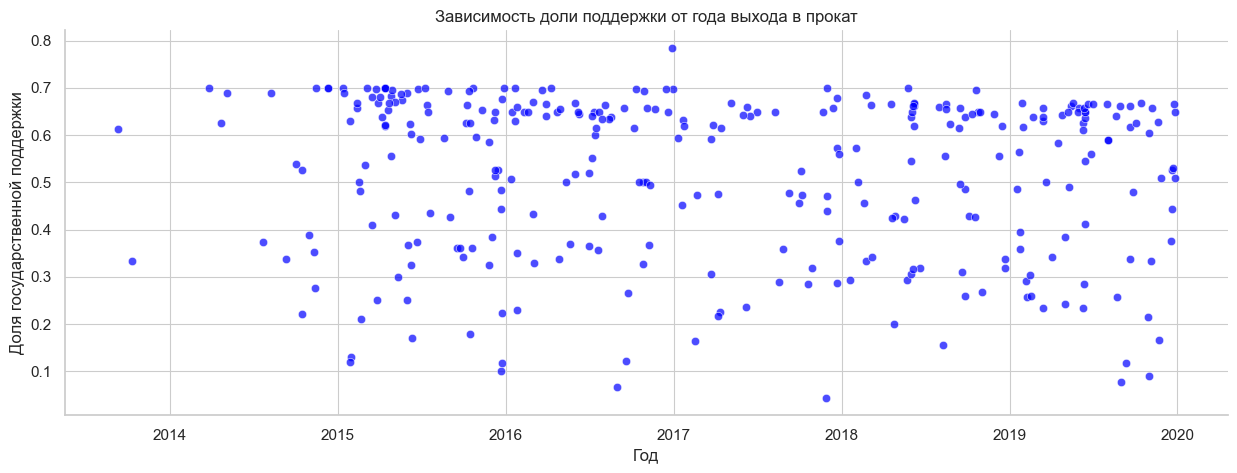

In [98]:
# Создание объектов "рисунок" и "оси" для графика
f, ax = plt.subplots(figsize=(15, 5))

# Создание scatter plot с использованием данных из DataFrame
sns.scatterplot(data=df_sup, x='show_start_date', y='government_support_ratio', color='blue', marker='o', alpha=0.7)

# Установка заголовка графика и подписей к осям
plt.title('Зависимость доли поддержки от года выхода в прокат')
plt.xlabel('Год')
plt.ylabel('Доля государственной поддержки')

# Улучшение видимости данных: уменьшение прозрачности, изменение маркера и цвета
sns.despine()

# Отображение сетки для лучшей ориентации
plt.grid(True, which='both', linewidth=0.8)

# Отображение графика
plt.show()

**Вывод:**
Согласно представленным данным по графику видно, что чаще всего доля гос. поддержки составляет 0.6 до 0.7. Построим гистограмму для объема гос. поддержки.

### Анализ объем гос. поддержи фильмов по годам

<Figure size 1400x1000 with 0 Axes>

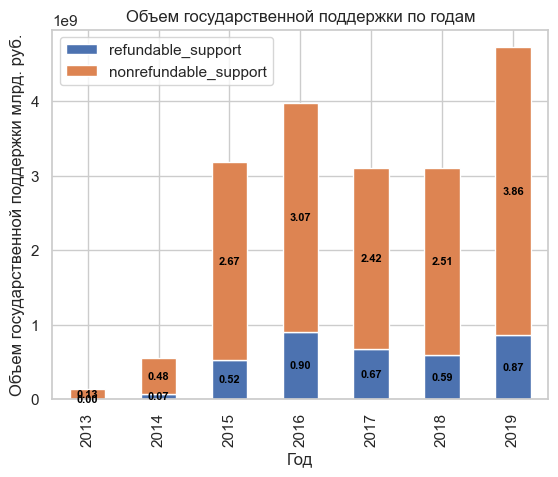

In [99]:
# Объем государственной поддержки
total_support_by_year = df_sup.groupby('show_year')[['refundable_support', 'nonrefundable_support']].sum()

# Визуализация
plt.figure(figsize=(14, 10))
total_support_by_year.plot(kind='bar', stacked=True)

# Добавление подписей к данным на графике
for i, year in enumerate(total_support_by_year.index):
    plt.text(i, total_support_by_year.loc[year, 'refundable_support'] / 2, f'{total_support_by_year.loc[year, "refundable_support"] / 1e9:.2f}', 
             ha='center', va='center', color='black', fontweight='bold', fontsize=8)
    plt.text(i, total_support_by_year.loc[year, 'refundable_support'] + total_support_by_year.loc[year, 'nonrefundable_support'] / 2,
             f'{total_support_by_year.loc[year, "nonrefundable_support"] / 1e9:.2f}',
             ha='center', va='center', color='black', fontweight='bold', fontsize=8)

# Установка заголовка графика и подписей к осям
plt.title('Объем государственной поддержки по годам')
plt.xlabel('Год')
plt.ylabel('Объем государственной поддержки млрд. руб.')

# Отображение графика
plt.show()

**Вывод:**
На основе полученных данных можно сделать вывод:
- **Общий тренд:** Общий объем государственной поддержки для фильмов, выходивших в прокат имеет тенденцию роста, начиная с 2015 года объем винансирования резко увеличился, это может быть свидетельством принятия новой программы финансирования отечественног кино.
- **Распределение видов поддержки:** Объем невозвратных средств (nonrefundable_support) значительно превышает объем возвратных средств (refundable_support) в каждом году. Невозвратных средст представляют собой большую долю в общей поддержке, что может свидетельствовать о том, что фильмы в большей доли не возвращают инвестиций.
- **Возможные факторы:**  Различия в объеме поддержки могут быть обусловлены различными факторами, такими как успешность фильмов, стратегии государственной поддержки, изменения в законодательстве и другие факторы. Анализ этих факторов может дополнительно прояснить динамику государственной поддержки в кинематографе.

### Анализ объем гос. поддержи фильмов по жанрам

In [100]:
# Функция для простроения столбчатой диаграммы
def build_plot(df_groupby, aggf, sort, column, title, x_label, y_label):
    try:
        support_by_genres = df_sup.groupby(df_groupby).agg(aggf)
        sorted_support_by_genres = support_by_genres.sort_values(by=sort, ascending=False)

        # Визуализация
        ax = sorted_support_by_genres[column].plot(
            kind='bar', stacked=True, figsize=(14, 8)
        )

        # Установка заголовка графика и подписей к осям
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)

        # Отображение графика
        plt.show()
        
    except Exception as e:
        return (f"График не может быть построен, убедитесь, что исходные данные введены корректно. Произошла ошибка: {e}")

In [101]:
build_plot('genre_primary', 'sum', 'full_support', ['refundable_support', 'nonrefundable_support'], 
               'Объем государственной поддержки по жанрам', 'Жанр', 'Объем государственной поддержки')

'График не может быть построен, убедитесь, что исходные данные введены корректно. Произошла ошибка: datetime64 type does not support sum operations'

**Вывод:**
Из представленных данных видно, что в жанре "Драма" получено наибольшее количество государственной поддержки, преимущественно в форме невозвратных средств. Вторым по объему поддержки является жанр "Комедия", далее идет жанр "Мультики". Мюзикл приносит наибольшую долю возвратных средств.

### Анализ средней рентабильности фильмов по жанрам, получающих гос.поддержку

Построим среднюю рентабильность по жанрам

In [102]:
build_plot('genre_primary', 'mean', 'profit_margin', 'profit_margin', 
               'Средняя рентабельность жанра', 'Жанр', 'Объем государственной поддержки')

'График не может быть построен, убедитесь, что исходные данные введены корректно. Произошла ошибка: agg function failed [how->mean,dtype->object]'

**Вывод:**
Согласно данным можно сделать вывод, что более половина жанром не рентабельны, а самые рентабельные жанры это: "Биография", "Спорт", "Приключения" и "Комедия".

### Анализ средней оценки фильмов по жанрам, получающих гос.поддержку

Построим график средней оценки фильмов по жанрам

In [103]:
build_plot('genre_primary', 'mean', 'ratings', 'ratings', 
               'Средняя оценка фильмов по жанрам', 'Жанр', 'Объем государственной поддержки')

'График не может быть построен, убедитесь, что исходные данные введены корректно. Произошла ошибка: agg function failed [how->mean,dtype->object]'

**Вывод:**
Согласно данным средняя оценка фильмов с гос. поддержкой колеблется от 5.1 до 7.4. Наивысший рейтинг имеют фильмы с жанром "Криминал" и "Детский". 

### Анализ рейтинга у фильмов, получающих гос.поддержку

Построим график распределения фильмов по рейтингу

C:\Users\Asus\anaconda3\envs\practicum\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


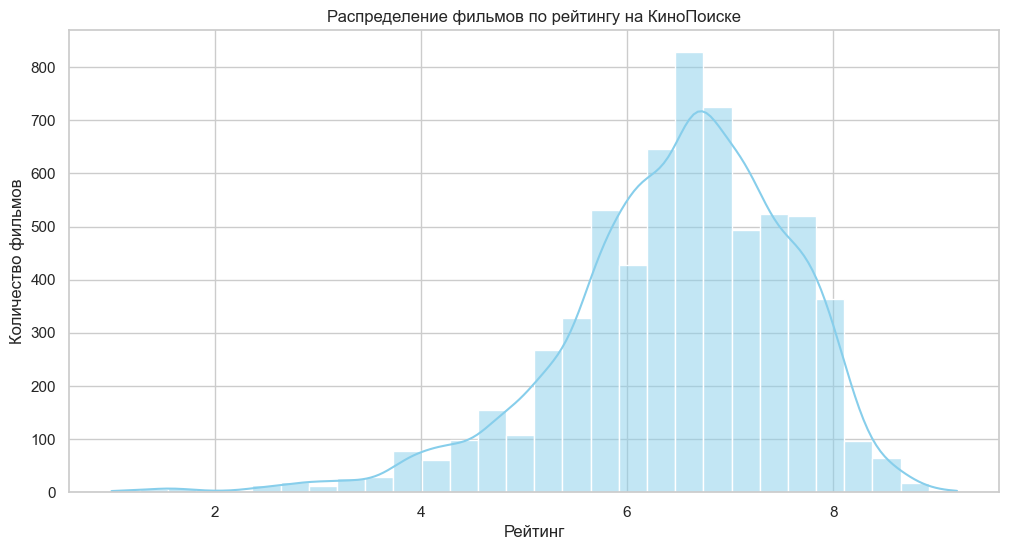

In [104]:
# График распределения фильмов по рейтингу
plt.figure(figsize=(12, 6))
sns.histplot(df['ratings'], bins=30, kde=True, color='skyblue')

# Установка заголовка графика и подписей к осям
plt.title('Распределение фильмов по рейтингу на КиноПоиске')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')

# Отображение графика
plt.show()

**Вывод:**
По графику видно, что в основном фильмы получали рейтинги от "6" до "7". Достаточно качественных фильмов с рейтингом "8+" и имеющих гос. поддержку мало, при этом имеется достаточно фильмов в низкими рейтингами.

### Анализ средней рентабельности источника финансирования

Построим график распределения средней рентабельности источника финансирования

In [105]:
build_plot('financing_source', 'mean', 'profit_margin', 'profit_margin', 
               'Средняя рентабельность источника финансирования', 'Источник финансирования', 'Объем государственной поддержки')

'График не может быть построен, убедитесь, что исходные данные введены корректно. Произошла ошибка: agg function failed [how->mean,dtype->object]'

**Вывод:**
На основе полученных данных, можно сделать заключение о том, что финансируемые фильмы "Фондом кино" более рентабельны, нежели финансируемые фильмы "Министерством культуры", что свидетельствует о том, что критерии выбора фильмов для финансирования более коммерчески выгодны у "Фонда кино".

### Анализ объема государственной поддержки по источникам финансирования

Построим график распределения объема государственной поддержки по источникам финансирования

In [106]:
build_plot('financing_source', 'sum', 'full_support', ['refundable_support', 'nonrefundable_support'], 
               'Объем государственной поддержки по источникам финансирования', 'Источник финансирования', 'Объем государственной поддержки')

'График не может быть построен, убедитесь, что исходные данные введены корректно. Произошла ошибка: datetime64 type does not support sum operations'

**Вывод:**
На основе полученных данных, можно сделать заключение о том, что финансируемые фильмы "Фондом кино" в большей своей массе приносят возвратные средства, при этом финансируемые фильмы "Министерством культуры" вообще не имеют возрастных средств, что свидетельствует о том, что "Министерство культуры" не заинтересована в возврате денежных средств, что в свою очередь может быть свидетельство того, что "Министерство культуры" финансирует фильмы через гранты которые не подразумевают возврат денежных средств. 

### Анализ возрастного рейтинга у фильмов, получающих гос.поддержку

Построим график распределения фильмов с гос. поддержкой по возрастному рейтингу

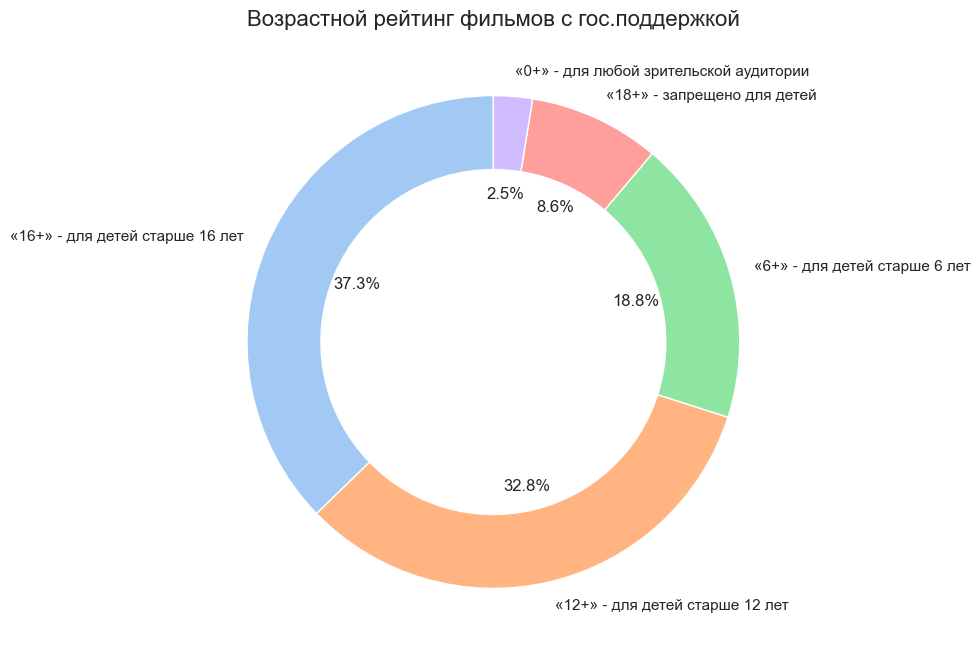

In [107]:
# Определим, какой возрастной рейтинг у фильмов, получающих гос.поддержку
plt.figure(figsize=(8, 8))
df_sup['age_restriction'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.3)
)

# Установка заголовка графика
plt.title('Возрастной рейтинг фильмов с гос.поддержкой', fontsize=16)

# Удаление подписи к оси Y
plt.ylabel("")

# Отображение графика
plt.show()

**Вывод:**
Из представленных данных видно, что наибольшее финансирование получают фильмы с возрастными рейтингами "12+" и "16+". В то время как фильмы с рейтингом "0+" получают меньше поддержки, а фильмы с рейтингом "18+" также не являются приоритетными в контексте государственной поддержки.

### Анализ  фильмов, получающих гос.поддержку в зависмости от режиссера

Создадим сводную таблицу для режиссеров

In [108]:
def pivot_table(index, sort, count_column):
    # Создаем сводную таблицу для index
    result = df_sup.pivot_table(
        index=index,  # Индексирование таблицы по именам index
        values=['full_support', 'government_support_ratio'],  # Выбор столбцов для анализа
        aggfunc={
            'full_support': 'sum',  # Суммируем полную сумму государственной поддержки
            'government_support_ratio': ['count', 'mean', 'median']  # Агрегируем данные по количеству, среднему и медиане
        }
    ).sort_values(by=sort, ascending=False).head(count_column)
    # Сортируем результаты по количеству фильмов по убыванию и выводим первые строки
    
    return result

pivot_table_result = pivot_table('director_first_name', ('government_support_ratio', 'count'), 7)
pivot_table_result

full_support government_support_ratio                  
                             sum                    count      mean  median
director_first_name                                                        
Р.Давлетьяров        459847945.0                        5  0.573600  0.6200
Д.Дьяченко           351000000.0                        4  0.509500  0.5295
С.Андреасян          325000000.0                        4  0.396000  0.3755
С.Мокрицкий          202510000.0                        3  0.431667  0.3850
А.Аксененко           90000000.0                        3  0.398000  0.4100
К.Шипенко            312000000.0                        3  0.452667  0.4560
А.Котт               129000000.0                        3  0.550667  0.5510

In [109]:
def build_plot_2(df, xlabel, title):
    try:
        fig, ax1 = plt.subplots(figsize=(10, 6))
        # Барплот для количества фильмов
        color = 'tab:blue'
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel('Количество фильмов', color=color)
        ax1.bar(df.index, df[('government_support_ratio', 'count')], color=color, alpha=0.7)
        ax1.tick_params(axis='y', labelcolor=color)

        # Вращение подписей оси x
        plt.xticks(rotation=45, ha='right')

        # Создаем вторую ось y для отображения других метрик
        ax2 = ax1.twinx()  
        color = 'tab:red'
        ax2.set_ylabel('Сумма гос. поддержки (в миллионах)', color=color)  
        ax2.plot(df.index, df[('full_support', 'sum')]/1e6, color=color, linestyle='dashed', marker='o')
        ax2.tick_params(axis='y', labelcolor=color)

        # Добавляем заголовок
        plt.title(title)

        # Показываем график
        plt.show()
    except Exception as e:
        return f"График не может быть построен. Убедитесь, что исходные данные введены корректно. Произошла ошибка: {e}"        

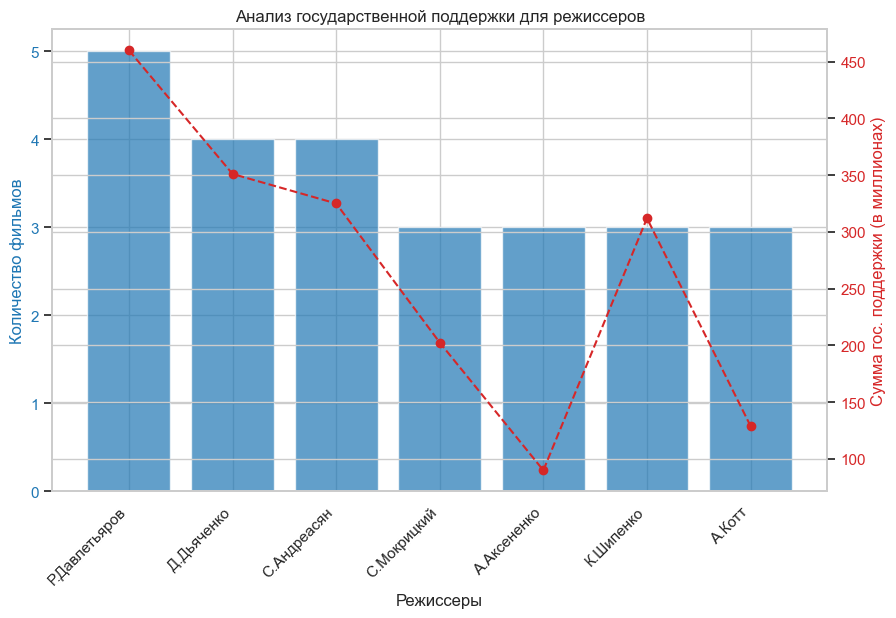

In [110]:
build_plot_2(pivot_table_result, 'Режиссеры', 'Анализ государственной поддержки для режиссеров')

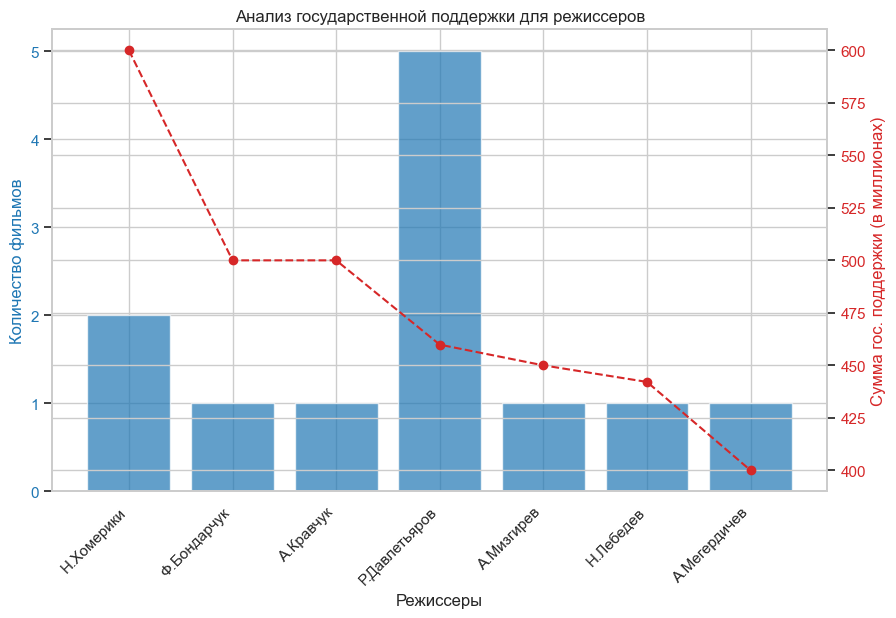

In [111]:
pivot_table_result = pivot_table('director_first_name', ('full_support', 'sum'), 7)
build_plot_2(pivot_table_result, 'Режиссеры', 'Анализ государственной поддержки для режиссеров')

**Вывод:**
Из представленных данных видно, что наибольшее финансирование получают фильмы срежиссированые Н.Хомерики, а фильмы Р.Давлетьярова чаще других получает гос. поддержку. 

### Анализ  фильмов, получающих гос.поддержку в зависмости от продюсеров

Создадим сводную таблицу для продюсеров

In [112]:
pivot_table_result = pivot_table('producer_first_name', ('government_support_ratio', 'count'), 7)
pivot_table_result

full_support government_support_ratio                  
                              sum                    count      mean  median
producer_first_name                                                         
С.Сельянов           1.550000e+09                       19  0.414526  0.4260
Э.Илоян              6.400000e+08                        9  0.411778  0.3750
Р.Дишдишян           3.520000e+08                        8  0.495750  0.5745
Т.Бекмамбетов        9.820000e+08                        8  0.607000  0.6300
Г.Малков             2.350000e+08                        6  0.467333  0.4685
Р.Давлетьяров        3.367979e+08                        5  0.575600  0.6200
ООО "ВИЗАРТ ФИЛЬМ"   5.400000e+08                        5  0.392000  0.3370

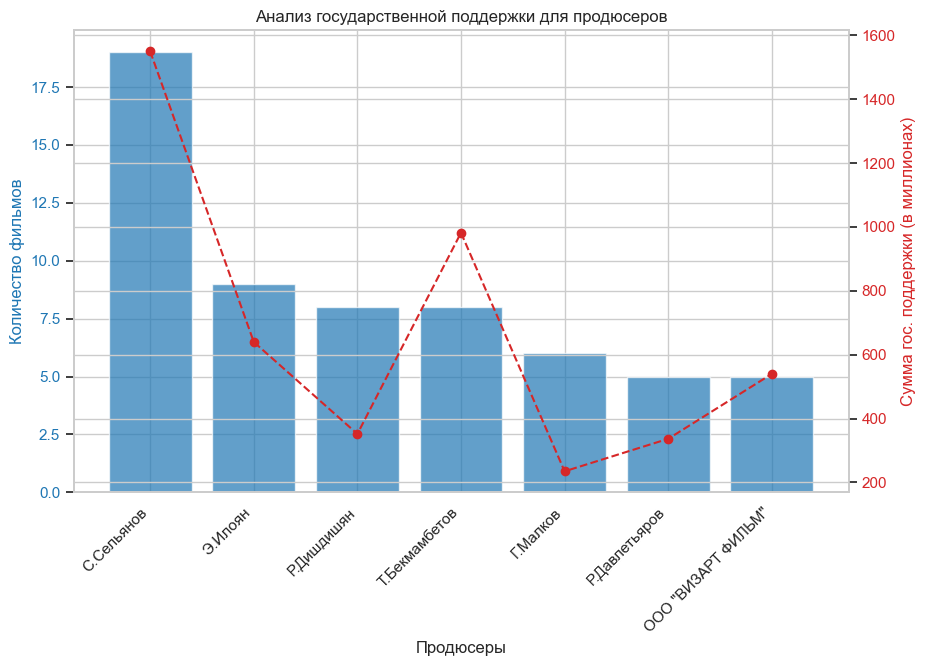

In [113]:
build_plot_2(pivot_table_result, 'Продюсеры', 'Анализ государственной поддержки для продюсеров')

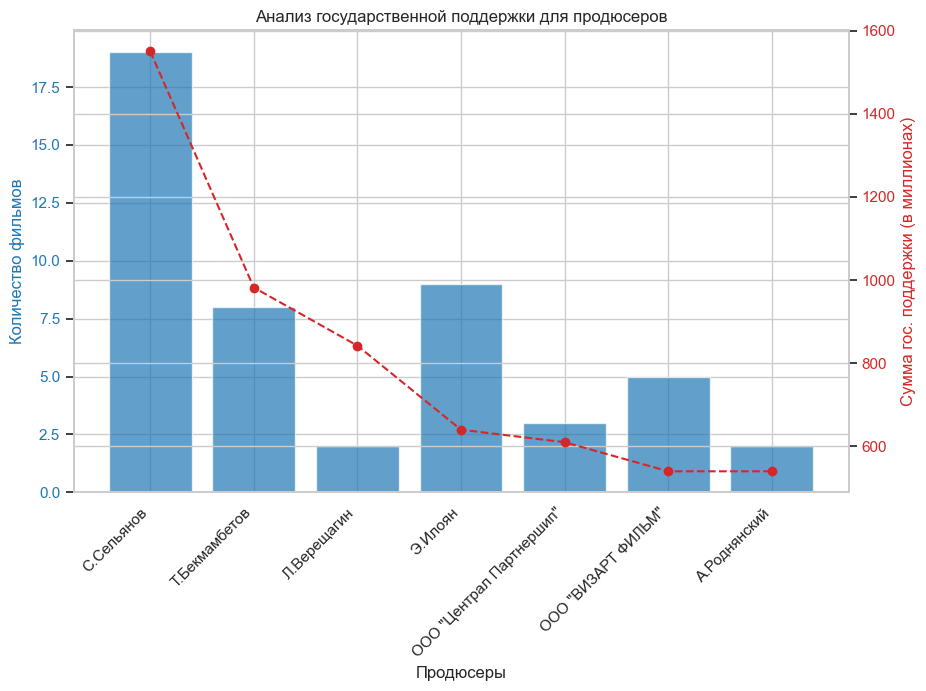

In [114]:
pivot_table_result = pivot_table('producer_first_name', ('full_support', 'sum'), 7)
build_plot_2(pivot_table_result, 'Продюсеры', 'Анализ государственной поддержки для продюсеров')

**Вывод:** Из представленных данных видно, что наибольшее финансирование получают фильмы спродюсированые С.Сельяновым, и его фильмы в разы чаще других получает гос. поддержку.

### Анализ  фильмов, получающих гос.поддержку в зависмости от студии

Создадим сводную таблицу для киностудий

In [115]:
pivot_table_result = pivot_table('film_studio_primary', ('government_support_ratio', 'count'), 7)
pivot_table_result

full_support  \
                                                    sum   
film_studio_primary                                       
ООО "ТаББаК"                               1.038000e+09   
ООО "Студия анимационного кино "Мельница"  6.300000e+08   
ООО "Кинокомпания "СТВ"                    1.900000e+08   
ООО "ВИЗАРТ ФИЛЬМ"                         5.400000e+08   
ООО "Энджой мувиз"                         3.300000e+08   
ООО "Киностудия "ВЕРТИКАЛЬ"                1.430000e+08   
ООО "Каро Продакшн"                        1.525000e+08   

                                          government_support_ratio            \
                                                             count      mean   
film_studio_primary                                                            
ООО "ТаББаК"                                                     9  0.617333   
ООО "Студия анимационного кино "Мельница"                        7  0.414429   
ООО "Кинокомпания "СТВ"                                          6  0.406000   
ООО "ВИЗАРТ ФИЛЬМ"                                               5  0.392000   
ООО "Энджой мувиз"                                               5  0.468000   
ООО "Киностудия "ВЕРТИКАЛЬ"                                      4  0.543750   
ООО "Каро Продакшн"                                              4  0.597000   

                                                   
                                           median  
film_studio_primary                                
ООО "ТаББаК"                               0.6870  
ООО "Студия анимационного кино "Мельница"  0.3610  
ООО "Кинокомпания "СТВ"                    0.3975  
ООО "ВИЗАРТ ФИЛЬМ"                         0.3370  
ООО "Энджой мувиз"                         0.4430  
ООО "Киностудия "ВЕРТИКАЛЬ"                0.6300  
ООО "Каро Продакшн"                        0.6410

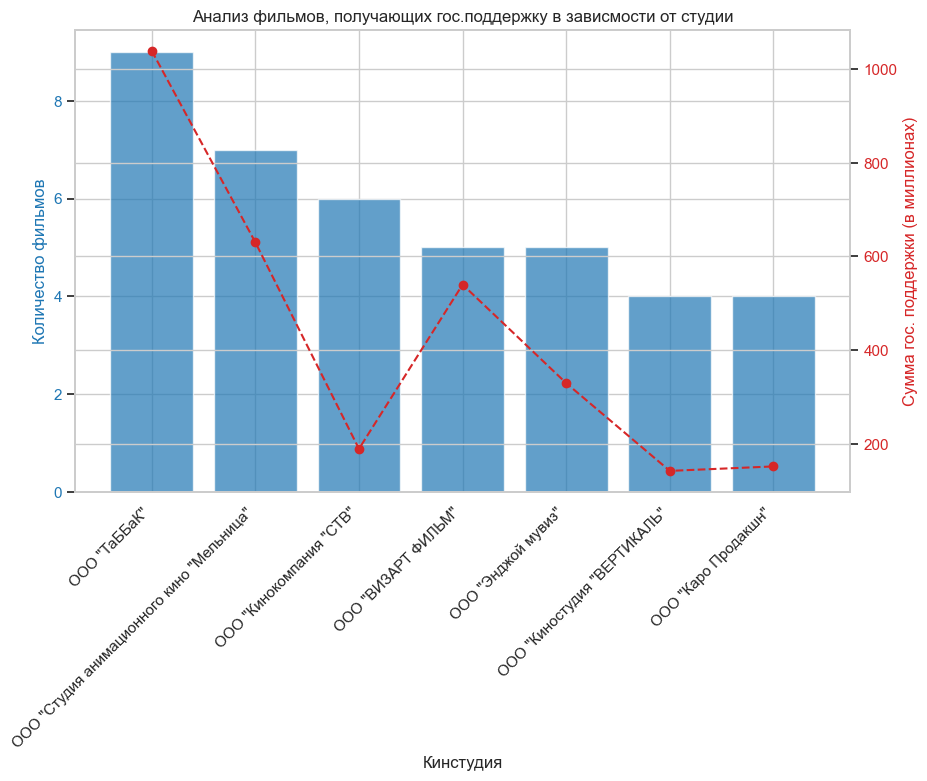

In [116]:
build_plot_2(pivot_table_result, 'Кинстудия', 'Анализ фильмов, получающих гос.поддержку в зависмости от студии')

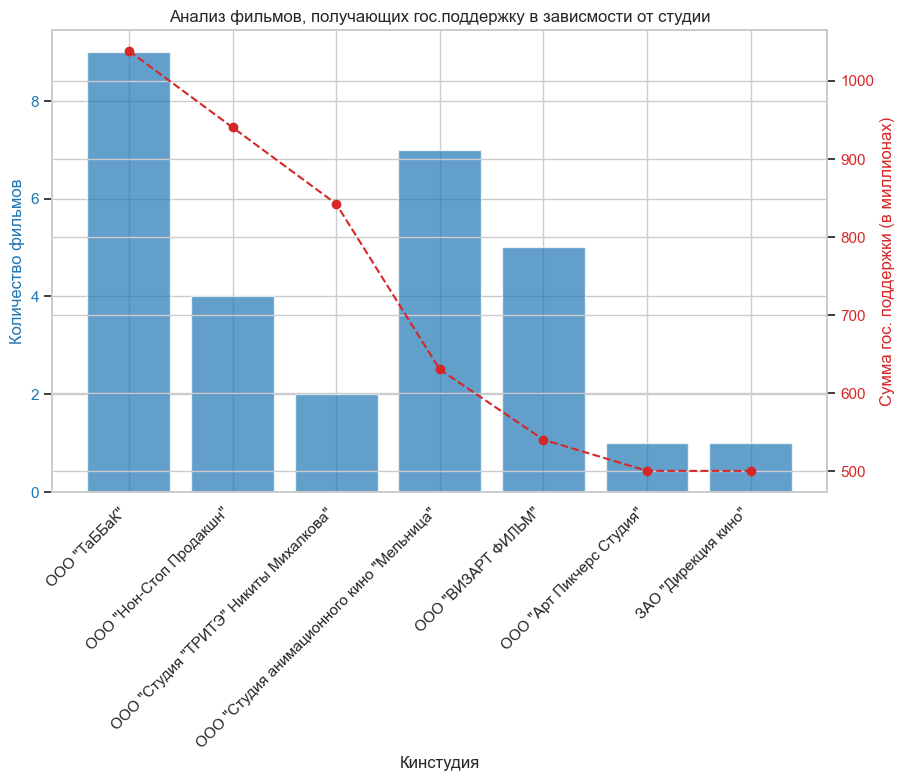

In [117]:
pivot_table_result = pivot_table('film_studio_primary', ('full_support', 'sum'), 7)
build_plot_2(pivot_table_result, 'Кинстудия', 'Анализ фильмов, получающих гос.поддержку в зависмости от студии')

**Вывод:** Из представленных данных видно, что наибольшее финансирование получают фильмы снятые киностудией ООО "ТаББаК" принадлежащая [Бекмамбетов Тимур Нуруахитович](https://77.ogrninfo.ru/общество/450698-ООО-ТАББАК/#:~:text=ООО%20%22Таббак%22%20-%20зарегистрировано%20по,7723575123%2C%20КПП%20772901001%2C%20ОГРН%201067746704630) и киностудии ООО "Нон-Стоп Продакшн", а фильмы снятые киностудией ООО "ТаББаК" и ООО "Студия анимационного кино "Мельница" чаще других получает гос. поддержку.

**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ 4:**

Для проведения анализа данных о фильмах, получивших государственную поддержку, был создан новый датафрейм `df_sup`, включающий только те фильмы, которые получили государственную поддержку (бюджет фильма больше 0). В данных изначально были пропуски в ratings и box_office, которые были устранены с добавлением соответствующих данных. Также добавлены новые столбцы: `full_support` (полная сумма господдержки) и `profit_margin` (рентабельность). Общее количество записей в датафрейме - 315

***При исследовании были проанализированы:***

- **Общий тренд:** Общий объем государственной поддержки для фильмов, выходивших в прокат, имеет тенденцию роста, начиная с 2015 года. Это может быть свидетельством принятия новой программы финансирования отечественного кино.
- **Распределение видов поддержки:** Объем невозвратных средств (nonrefundable_support) значительно превышает объем возвратных средств (refundable_support) в каждом году. Невозвратные средства представляют собой большую долю в общей поддержке, что может свидетельствовать о том, что фильмы в большей степени не возвращают инвестиции.
- **Возможные факторы:** Различия в объеме поддержки могут быть обусловлены различными факторами, такими как успешность фильмов, стратегии государственной поддержки, изменения в законодательстве и другие факторы. Анализ этих факторов может дополнительно прояснить динамику государственной поддержки в кинематографе.
- **Вывод по жанрам:** Из представленных данных видно, что в жанре "Драма" получено наибольшее количество государственной поддержки, преимущественно в форме невозвратных средств. Вторым по объему поддержки является жанр "Комедия", далее идет жанр "Мультики". Мюзикл приносит наибольшую долю возвратных средств.
- **Рентабельность жанров:** Согласно данным, более половина жанров не рентабельны, а самые рентабельные жанры включают "Биографию", "Спорт", "Приключения" и "Комедию".
- **Оценки и рейтинги:** Средняя оценка фильмов с государственной поддержкой колеблется от 5.1 до 7.4. Фильмы с жанром "Криминал" и "Детский" имеют наивысший рейтинг.
- **Распределение рейтингов:** По графику видно, что в основном фильмы получают рейтинги от "6" до "7". Достаточно качественных фильмов с рейтингом "8+" и имеющих государственную поддержку мало, при этом есть фильмы с низкими рейтингами.
- **Финансирование от "Фонда кино" и "Министерства культуры":** Фильмы, финансируемые "Фондом кино", более рентабельны, чем фильмы, финансируемые "Министерством культуры". "Фонд кино" в большей мере получает возвратные средства, что свидетельствует о более коммерческой ориентации выбора проектов.
- **Финансирование и возрастной рейтинг:** Фильмы с возрастными рейтингами "12+" и "16+" получают наибольшую государственную поддержку, в то время как фильмы с рейтингом "0+" получают меньше поддержки, а фильмы с рейтингом "18+" не являются приоритетными в контексте государственной поддержки.
- **Режиссеры:** Наибольшее финансирование получают фильмы срежиссированые Н.Хомерики, а фильмы Р.Давлетьярова чаще других - - - **Продюсеры:** Наибольшее финансирование получают фильмы спродюсированые С.Сельяновым, и его фильмы в разы чаще других получает гос. поддержку.
- **Киностудии:** Наибольшее финансирование и чаще других получает гос. поддержку получают фильмы снятые киностудией ООО "ТаББаК" принадлежащая Бекмамбетов Тимур Нуруахитович.
- **Направления для дополнительного анализа:** В связи с ограниченным временем для проведения анализа, не были рассмотрены некоторые факторы влияния на возвратные и не возратные средства, такие как продюсеры, режиссеры, студии, тип фильма и другие. Анализ этих факторов может дополнительно прояснить факторы, влияющие на государственную поддержку в кинематографе.

## Общий вывод

- **Объединение данных:**
    - Исходные данные загружены из csv-файлов, проведена оценка структуры и содержания.
    - Была проведена предобработка, включающая обработку уникальных значений, обработку пропусков и ошибок, удаление дубликатов, приведение данных к нужным типам.
    - Данные объединены в датафрейм df с учетом номера прокатного удостоверения.
- **Предобработка данных:**
    - Типы данных проверены и приведены в соответствие.
    - Дата начала проката преобразована в формат datetime.
    - Обработаны уникальные значения в рейтингах.
    - Решены пропуски и ошибки в различных столбцах.
    - Удалены лишние пробелы и обработаны категориальные данные.
    - Идентифицированы неявные дубликаты в режиссерах и продюсерах.
    - Созданы новые столбцы для улучшения анализа.
- **Исследовательский анализ данных:**
    - Количество фильмов, получивших прокатные удостоверения, имеет тенденцию к росту с 2010 года.
    - Суммарные кассовые сборы увеличиваются с 2014 года, с пиком в 2018 году.
    - Средние и медианные сборы сильно зависят от выбросов в данных, но в целом остаются на высоком уровне после 2014 года.
    - Фильмы с возрастным ограничением "16+" принесли наибольший доход, а фильмы "18+" и "0+" - менее прибыльные.
- **Исследование фильмов с государственной поддержкой:**
    - Создан датафрейм df_sup, включающий фильмы с государственной поддержкой (бюджет фильма больше 0).
    - Устранены пропуски в рейтингах и кассовых сборах, добавлены данные, где это возможно.
    - Добавлены новые столбцы: full_support (полная сумма господдержки) и profit_margin (рентабельность).
    - Общее количество записей в датафрейме - 315.
- **Обобщенные результаты:**
    - Общий тренд: Объем государственной поддержки для фильмов в прокате растет, особенно с 2015 года. Возможно, это связано с принятием новых программ финансирования отечественного кино.
    - Распределение видов поддержки: Невозвратные средства преобладают, что свидетельствует о том, что фильмы чаще не возвращают инвестиции.
    - Возможные факторы: Различия в объеме поддержки могут зависеть от успешности фильмов, стратегии государственной поддержки и изменений в законодательстве.
    - Вывод по жанрам: "Драма" получает наибольшую поддержку, в основном в форме невозвратных средств. "Комедия" и "Мультфильмы" также в топе. Мюзиклы чаще возвращают инвестиции.
    - Рентабельность жанров: Более половины жанров не рентабельны. Наиболее успешные жанры: "Биография", "Спорт", "Приключения" и "Комедия".
    - Оценки и рейтинги: Средняя оценка колеблется от 5.1 до 7.4. "Криминал" и "Детский" - жанры с наивысшим рейтингом.
    - Распределение рейтингов: Фильмы чаще получают рейтинги от "6" до "7". Фильмов с рейтингом "8+" мало, есть фильмы с низкими рейтингами.
    - Финансирование от "Фонда кино" и "Министерства культуры": "Фонд кино" более рентабелен, получает возвратные средства, что указывает на более коммерческую ориентацию выбора проектов.
    - Финансирование и возрастной рейтинг: Фильмы с рейтингами "12+" и "16+" получают наибольшую поддержку, "0+" - меньше, "18+" - не приоритет.
- **Обобщенный вывод:**
Исследование динамики российского кинопроката указывает на рост отрасли с увеличением числа выходящих в прокат фильмов. Значительное влияние на кассовые сборы оказывают выбросы в данных, требующие дополнительного анализа. Возрастные рейтинги также оказывают существенное влияние на успех фильма, с "16+" считающимся наиболее прибыльным категорией. Для полного понимания факторов, влияющих на успех фильмов в России, необходимо дополнительное исследование аномалий и выбросов.
- **Направления для дополнительного анализа:**
Продюсеры, режиссеры, студии, тип фильма и другие факторы могут дополнительно прояснить влияние на государственную поддержку в кинематографе. Дополнительные исследования этих аспектов помогут лучше понять факторы, влияющие на выбор проектов для финансирования.
- **Рекомендации по улучшению качества данных:**
    - *Обработка пропусков и ошибок:*
        - Провести более детальный анализ данных для выявления пропусков и ошибок в различных столбцах.
        - Разработать стратегию обработки пропущенных данных, возможно, с использованием методов интерполяции, заполнения средними значениями или удаления строк/столбцов.
    - *Стандартизация данных:*
        - Проверить и стандартизировать форматы данных, такие как даты и числовые значения.
        - Обратить внимание на единообразие написания текстовых данных, таких как названия жанров, имена продюсеров и режиссеров.
    - *Устранение дубликатов:*
        - Провести более детальный анализ наличия дубликатов в столбцах, таких как имена продюсеров и режиссеров.
        - В случае обнаружения дубликатов, разработать стратегию их устранения.
    - *Валидация и коррекция данных:*
        - Провести валидацию данных, особенно в столбцах с уникальными значениями, чтобы исключить наличие ошибок в них.
        - Перепроверить корректность данных, которые могли быть внесены вручную, такие как рейтинги или бюджеты.
    - *Обучение персонала:*
        - Обучить сотрудников, внесших данные, стандартам и правилам заполнения информации, чтобы уменьшить количество ошибок и улучшить единообразие данных.
    - *Мониторинг качества данных:*
        - Внедрить систему мониторинга качества данных, чтобы оперативно выявлять и исправлять проблемы, а также предотвращать их возникновение в будущем.

*Применение этих рекомендаций поможет повысить точность, надежность и полноту данных, что в свою очередь обеспечит более качественное и надежное проведение анализа исследования.*